In [16]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt


def generate_tsp(n_nodes):
    # Generate random city coordinates
    np.random.seed(42)
    nodes = pd.DataFrame(np.random.rand(n_nodes, 2))
    distance_mat = np.zeros((n_nodes, n_nodes))
    #calculating distace between 2 nodes and store in a matrix
    for i in range(n_nodes):
        for j in range(n_nodes):
            distance_mat[i,j] = (math.sqrt((nodes.iloc[i][0] - nodes.iloc[j][0])**2 +
                                      (nodes.iloc[i][1] - nodes.iloc[j][1])**2))*10
   
    return nodes, distance_mat



def initial_sol(distance_mat):
    n_nodes = distance_mat.shape[0]
    pending_node = set(range(1, n_nodes))
    cur_node = 0
    tour = [cur_node]
    #finding the intial solution
    while pending_node:
        nearest = float('inf')
        nearest_node = None
        for node in pending_node:
            if distance_mat[cur_node][node] < nearest:
                nearest = distance_mat[cur_node][node]
                nearest_node = node
        tour.append(nearest_node)
        pending_node.remove(nearest_node)
        cur_node = nearest_node
    return tour


def get_total_distance(distance_mat, tour):
    n_nodes = len(tour)
    total_distance = 0
    #finding the total distance
    for i in range(n_nodes):
        j = (i + 1) % n_nodes
        total_distance += distance_mat[tour[i], tour[j]]
    return total_distance

# Generate problem instance
nodes, distance_mat = generate_tsp(40)
# Find the initial solution
init_tour = initial_sol(distance_mat)
init_distance = get_total_distance(distance_mat, init_tour)

# Print the results
print('Initial solution')
print('Initial tour:', init_tour)
print('Initial total distance:', init_distance)
print('-----------------------------------------')


def plot_solution(tour, distance, nodes, distance_mat, title):
    fig, axs = plt.subplots(1, 2, figsize=(6, 6))

    # convergence plot
    axs[0].plot(distance)
    axs[0].set_xlabel('Iteration')
    axs[0].set_ylabel('Distance')
    axs[0].set_title('Convergence Plot')
    #axs[1].set_xlim([min(nodes.values[:, 0]), max(nodes.values[:, 0])]) 

    # solution path plot
    axs[1].scatter(nodes.values[:, 0], nodes.values[:, 1])  
    for i in range(len(tour)):
        j = (i + 1) % len(tour)
        city_i = tour[i]
        city_j = tour[j]
        axs[1].plot([nodes.values[city_i, 0], nodes.values[city_j, 0]], [nodes.values[city_i, 1], nodes.values[city_j, 1]], 'k-', linewidth=0.5)
    axs[1].set_xlabel('X')
    axs[1].set_ylabel('Y')
    axs[1].set_title('Solution Path Plot')

    fig.suptitle(title)
    plt.show()



Initial solution
Initial tour: [0, 12, 4, 37, 1, 19, 31, 6, 35, 38, 10, 15, 24, 14, 39, 18, 7, 2, 28, 29, 20, 13, 32, 8, 23, 22, 33, 3, 21, 16, 34, 5, 36, 11, 30, 9, 27, 26, 17, 25]
Initial total distance: 60.02738695252857
-----------------------------------------


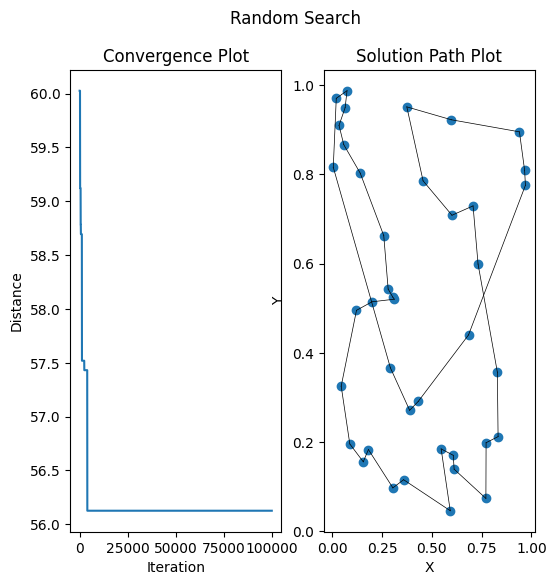

random search
Improved tour: [27, 0, 12, 4, 37, 1, 31, 6, 35, 38, 10, 15, 24, 14, 39, 18, 7, 2, 28, 29, 20, 13, 23, 8, 32, 22, 33, 3, 21, 16, 34, 5, 36, 11, 30, 9, 19, 25, 17, 26]
Improved total distance: 56.12553082996253
-----------------------------------------


In [17]:
def random_search(distance_mat, max_iter):
    rs_tour = initial_sol(distance_mat)
    rs_distance = get_total_distance(distance_mat, rs_tour)
    n_nodes = distance_mat.shape[0]
    rs_dist_history = [rs_distance]
    
    for i in range(max_iter):
        tour = rs_tour.copy()
        # Randomly swap two cities
        a, b = np.random.choice(range(n_nodes), size=2, replace=False)  
        tour[a], tour[b] = tour[b], tour[a]
        new_distance = get_total_distance(distance_mat, tour)  
         # Check if the new tour has a shorter distance , if so accept the new tour
        if new_distance < rs_distance:
            rs_tour = tour
            rs_distance = new_distance
        rs_dist_history.append(rs_distance) 
        
    title = 'Random Search'
    plot_solution(rs_tour, rs_dist_history, nodes, distance_mat, title)
    return rs_tour, rs_distance ,rs_dist_history 

#plot the solutions
rs_best_tour, rs_best_distance ,rs_dist_history = random_search(distance_mat, max_iter=100000)
print('random search')
print('Improved tour:', rs_best_tour)
print('Improved total distance:', rs_best_distance)
print('-----------------------------------------')

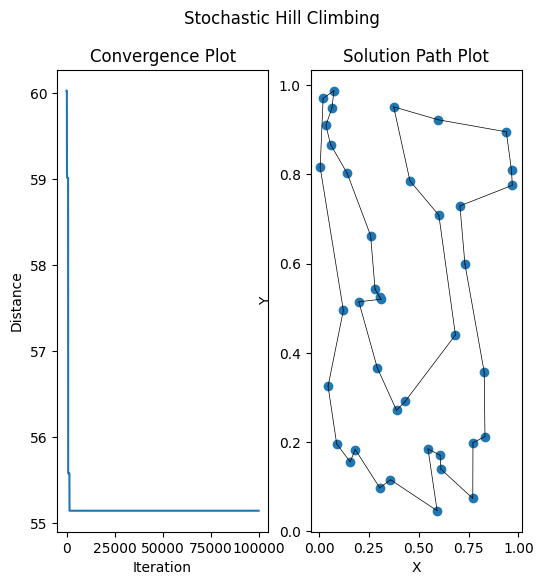

hill climber
Improved tour: [31, 6, 35, 38, 10, 15, 24, 14, 39, 18, 7, 2, 28, 29, 20, 36, 5, 34, 16, 21, 3, 33, 22, 32, 8, 23, 13, 11, 30, 9, 19, 4, 12, 0, 27, 26, 17, 25, 37, 1]
Improved total distance: 55.1449402448298
-----------------------------------------


In [18]:
def stochastic_hill_climbing(distance_mat, max_iter):
    n_nodes = distance_mat.shape[0]
    shc_tour = initial_sol(distance_mat)
    shc_distance = get_total_distance(distance_mat, shc_tour)
    
    shc_dist_history = [shc_distance]
    
    for i in range(max_iter):
        tour = shc_tour.copy()
        #reverse the nodes path to find the new solution 
        i, j = sorted(np.random.choice(range((n_nodes)), 2, replace=False))    
        tour[i:j+1] = reversed(tour[i:j+1])
        new_distance = get_total_distance(distance_mat, tour)
        #compareing the new solution with existing one to find teh best
        if new_distance < shc_distance :
            shc_tour = tour
            shc_distance = new_distance
        shc_dist_history.append(shc_distance)
               
    
    title = 'Stochastic Hill Climbing'
    plot_solution(shc_tour, shc_dist_history, nodes, distance_mat, title)   
    
    return shc_tour, shc_distance

shc_tour, shc_distance = stochastic_hill_climbing(distance_mat, max_iter=100000)
#plot the solutions
print('hill climber')
print('Improved tour:', shc_tour)
print('Improved total distance:', shc_distance)
print('-----------------------------------------')

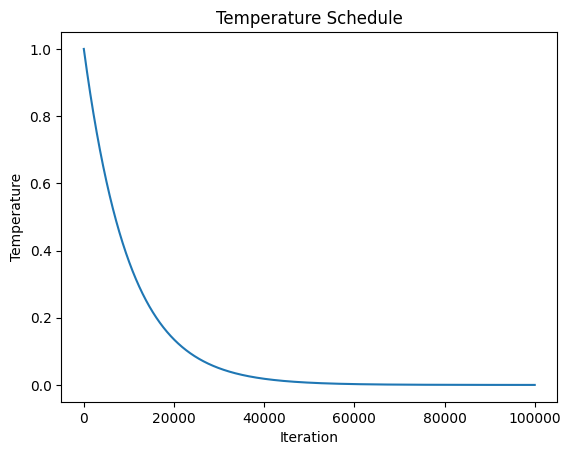

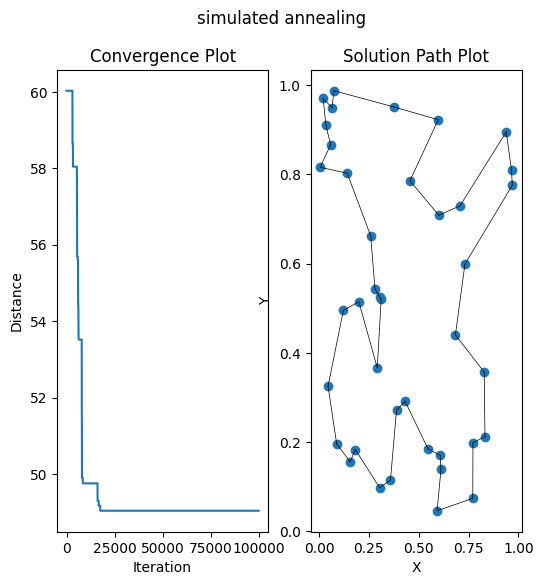

simulated annealing
Improved tour: [1, 19, 31, 6, 35, 38, 14, 10, 15, 24, 9, 30, 39, 18, 7, 2, 28, 29, 20, 13, 11, 23, 8, 32, 22, 33, 36, 3, 21, 5, 16, 34, 0, 27, 12, 4, 37, 26, 17, 25]
Improved total distance: 49.03915626625454
-----------------------------------------


In [24]:

def simulated_annealing(distance_mat, max_iter, initial_temp, final_temp, alpha, n_restart):
    n_nodes = distance_mat.shape[0]
    sa_best_tour = None
    sa_best_distance = float('inf')
    sa_dist_history = [sa_best_distance]
    temp_history = [initial_temp]
    
    for _ in range(n_restart):
        current_tour = initial_sol(distance_mat)
        current_dist = get_total_distance(distance_mat, current_tour)
        sa_best_tour = current_tour
        sa_best_distance = current_dist
        temp = initial_temp
        
        for i in range(max_iter):
            # Generate a new neighbor   
            sol_tour = current_tour.copy()
            a, b = sorted(np.random.choice(range(n_nodes), size=2, replace=False))
            sol_tour = current_tour[:a] + current_tour[a:b][::-1] + current_tour[b:]
            sol_dist = get_total_distance(distance_mat, sol_tour)
            

            # Accept the new neighbor if it is better than the current tour
            if sol_dist < current_dist:
                current_tour = sol_tour
                current_dist = sol_dist
                if sol_dist < sa_best_distance:
                    sa_best_tour = sol_tour
                    sa_best_distance = sol_dist
            # Accept the new neighbor with a certain probability if it is worse than the current tour
            else:
                probability = min(1,np.exp(-(sol_dist-current_dist)/temp))
                if np.random.uniform(0,1) < probability :
                    current_tour = sol_tour
                    current_dist = sol_dist
                    
            # Decrease the temperature
            temp = temp * alpha  
            temp_history.append(temp)
            sa_dist_history.append(sa_best_distance)

    
    #temperature reduction plot            
    title = 'simulated annealing'            
    plt.plot(temp_history)
    plt.xlabel('Iteration')
    plt.ylabel('Temperature')
    plt.title('Temperature Schedule')
    plt.show()  
    plot_solution(sa_best_tour, sa_dist_history, nodes, distance_mat, title)
          
    
    return sa_best_tour, sa_best_distance 

sa_best_tour, sa_best_distance = simulated_annealing(distance_mat, max_iter=100000, initial_temp=1, final_temp=0.0001, alpha=0.9999,n_restart=1)
print('simulated annealing')
print('Improved tour:', sa_best_tour)
print('Improved total distance:', sa_best_distance)
print('-----------------------------------------')


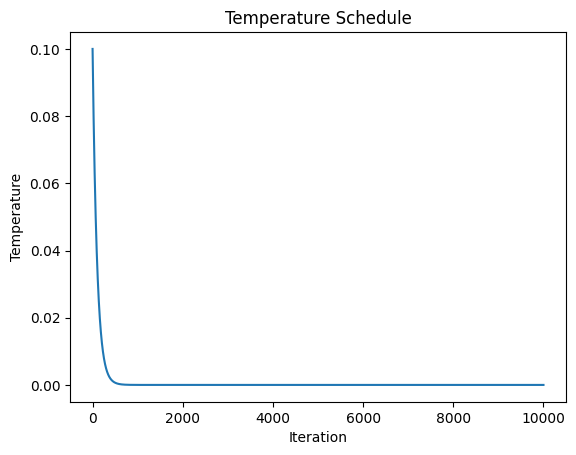

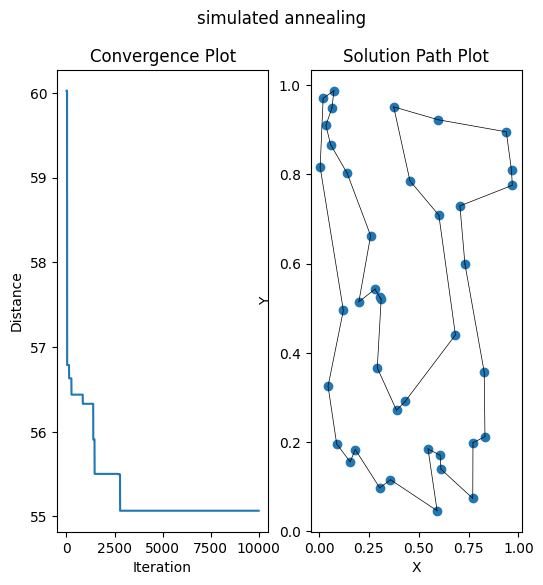

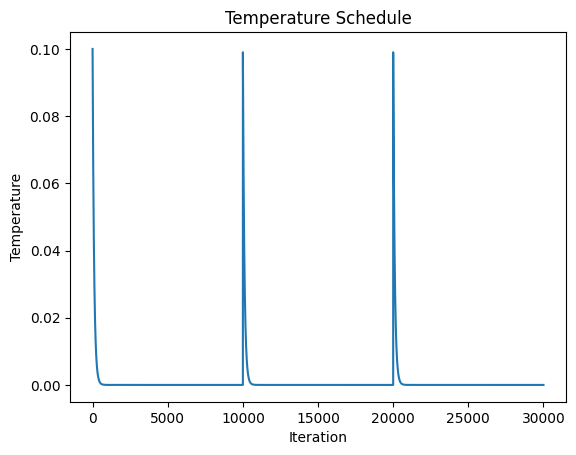

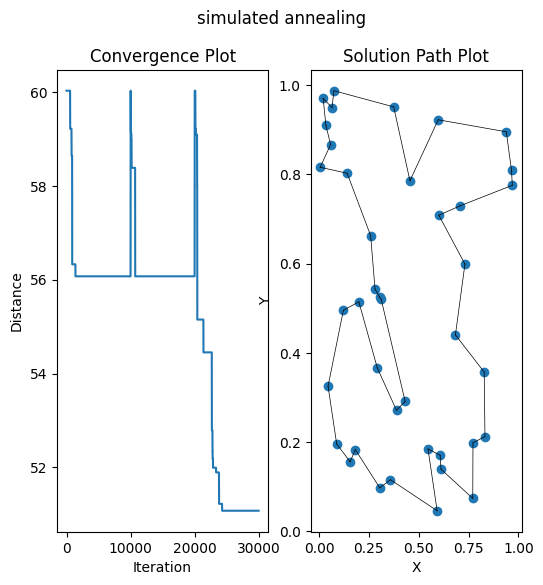

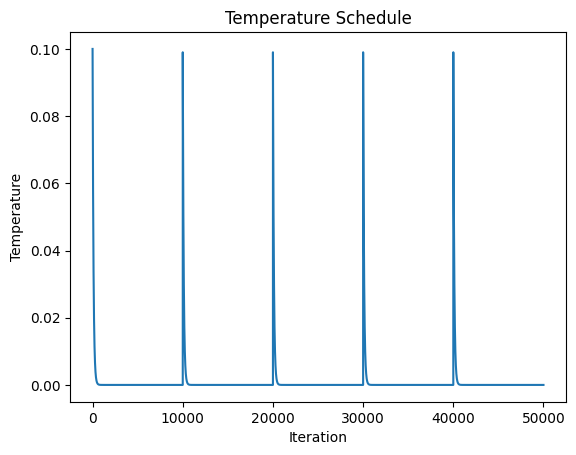

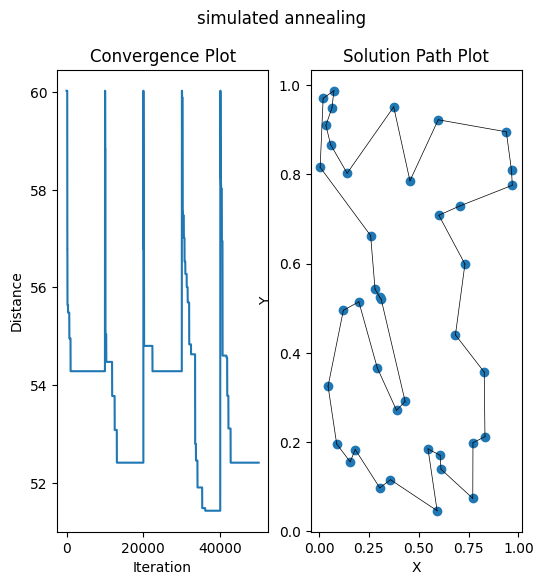

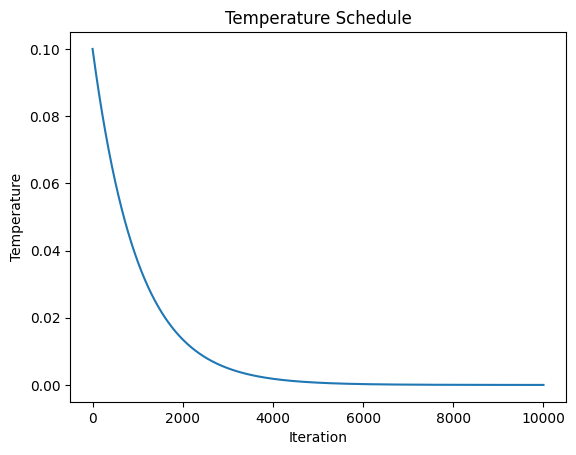

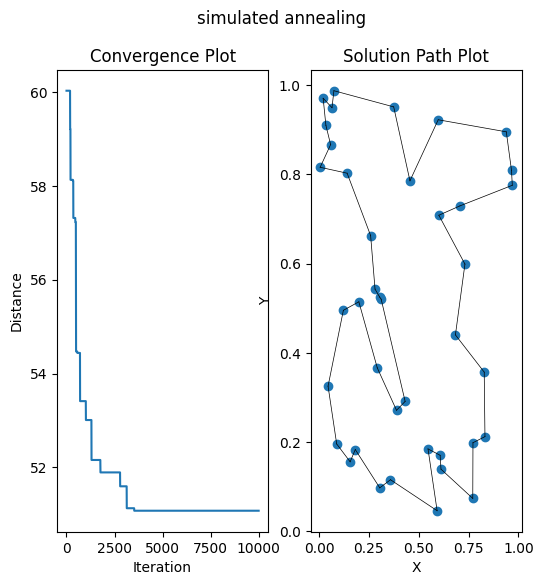

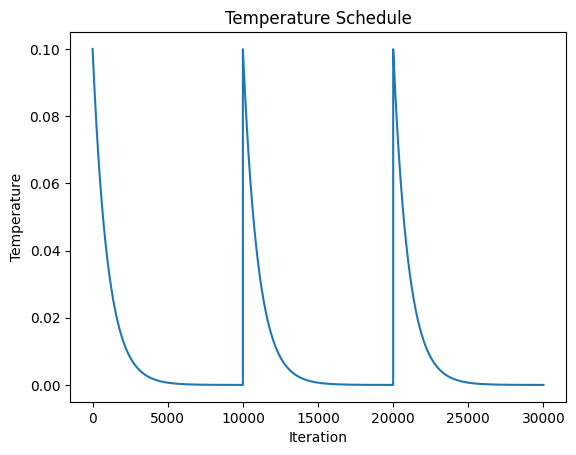

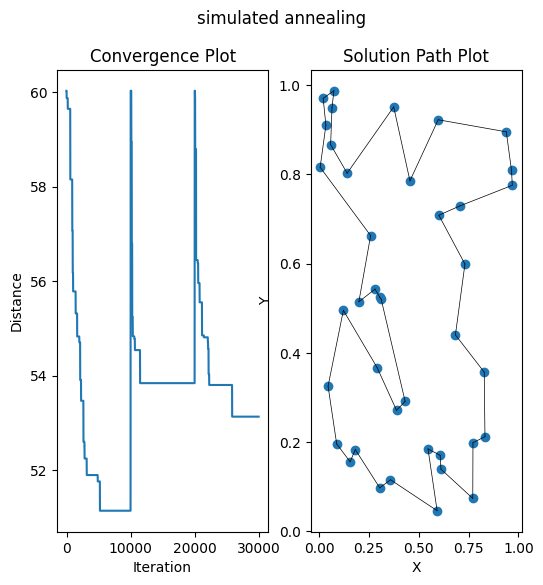

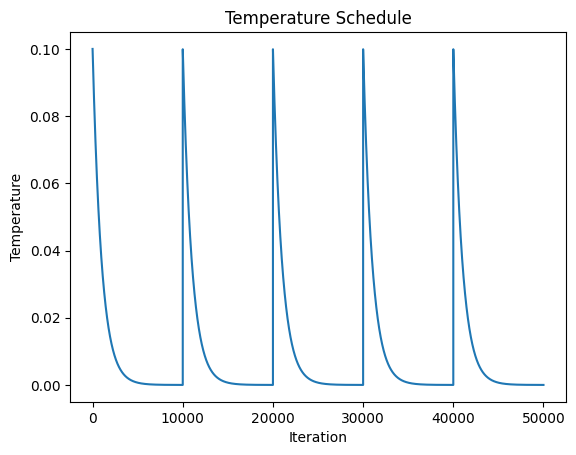

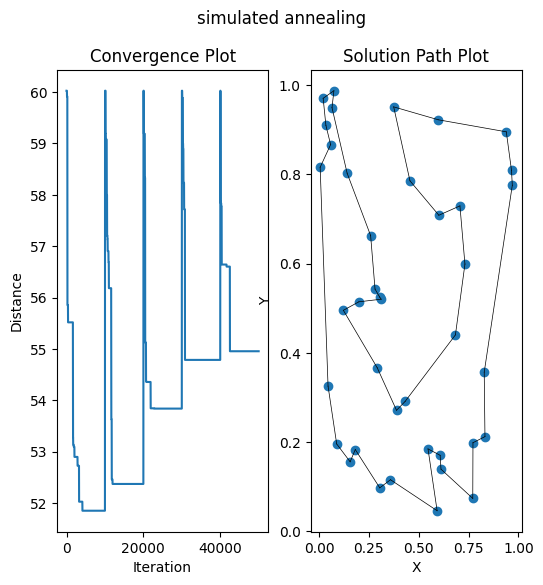

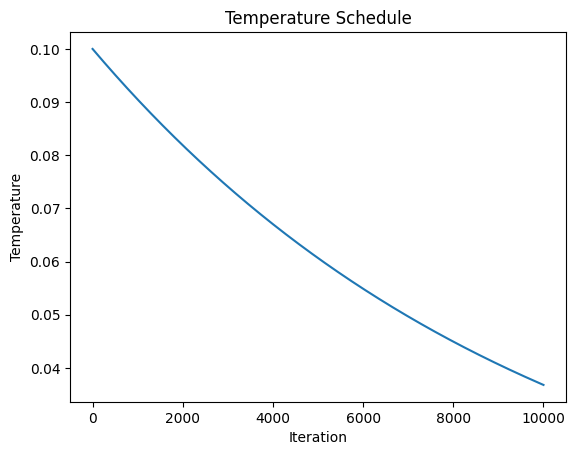

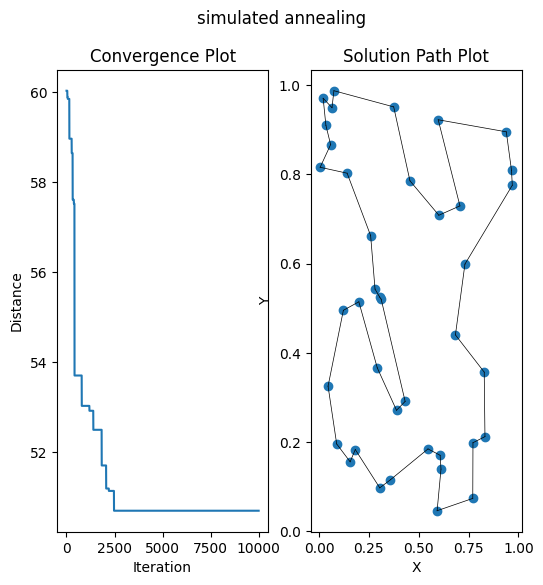

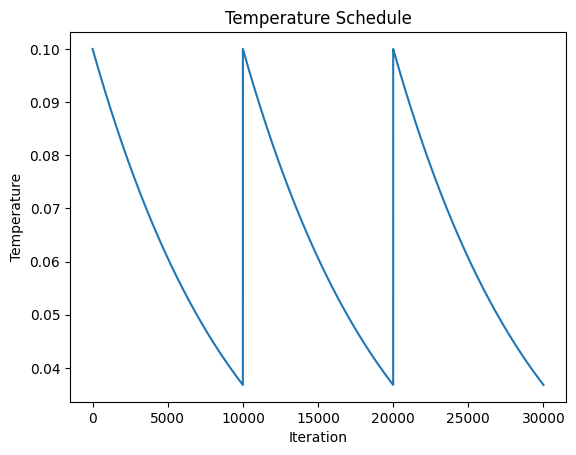

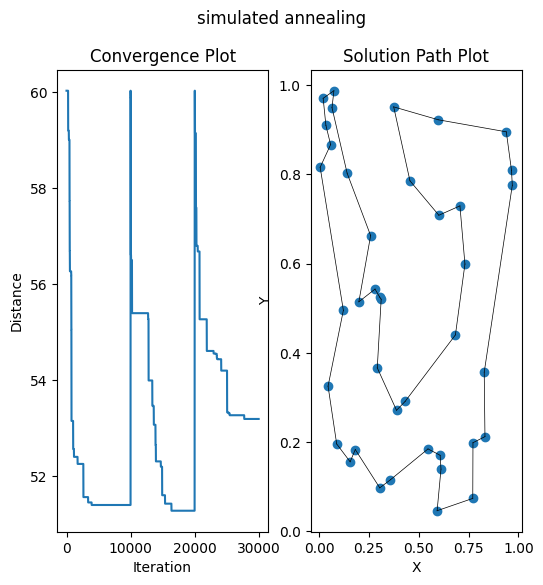

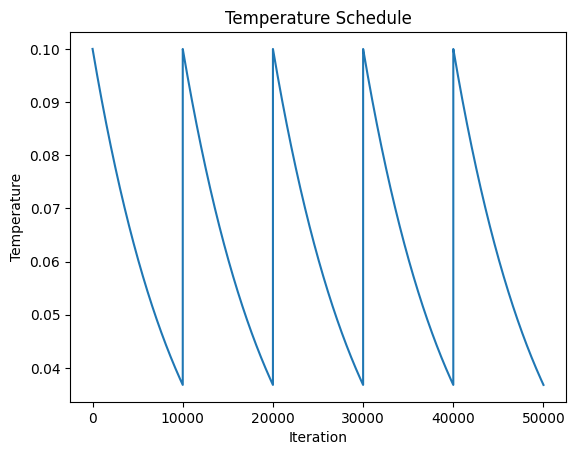

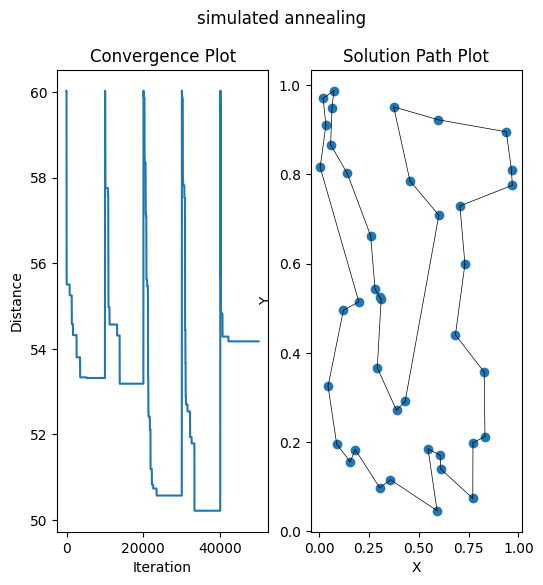

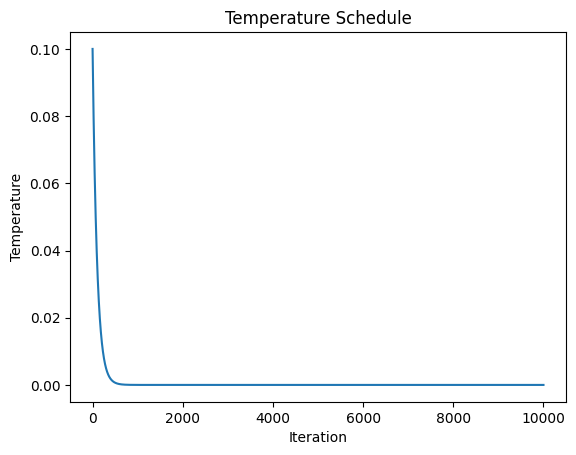

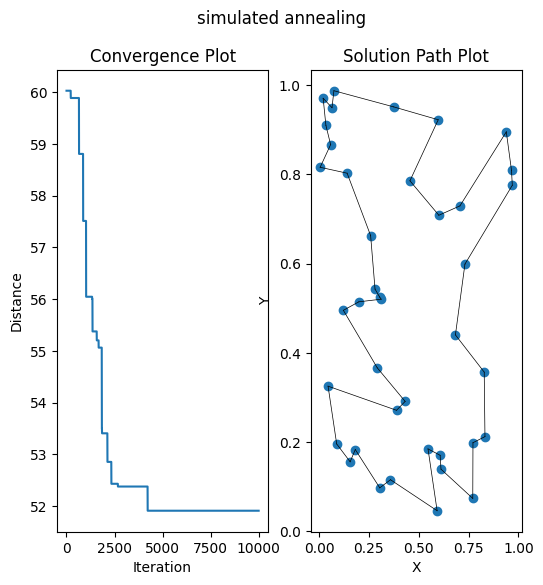

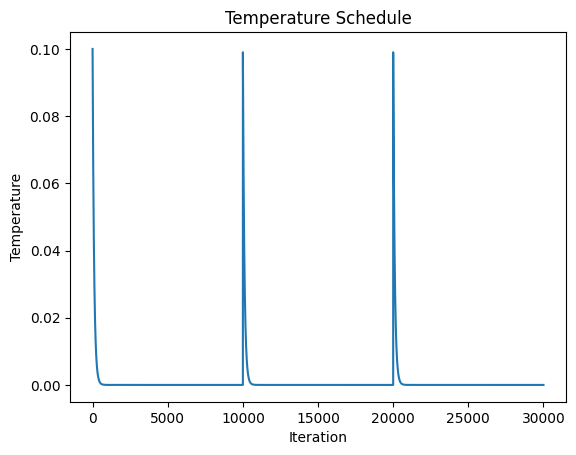

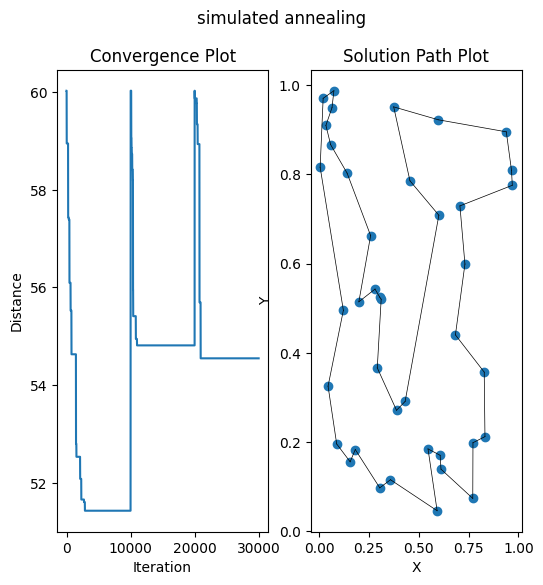

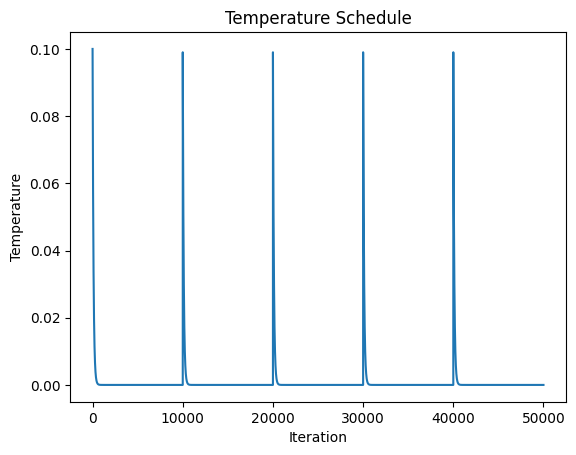

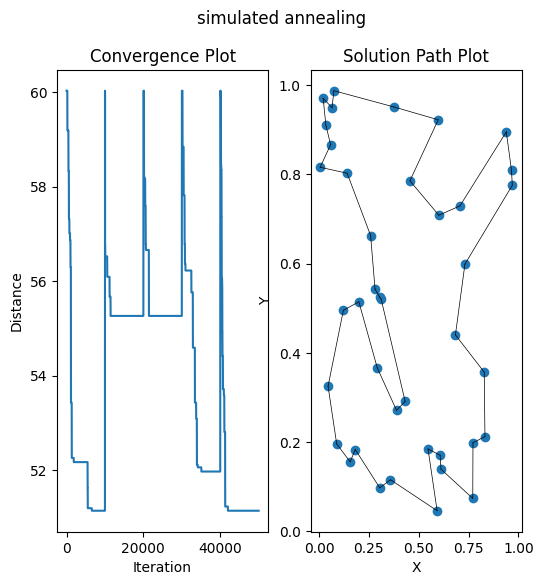

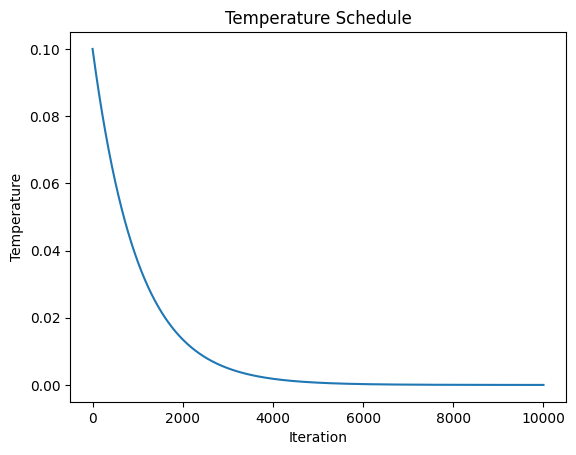

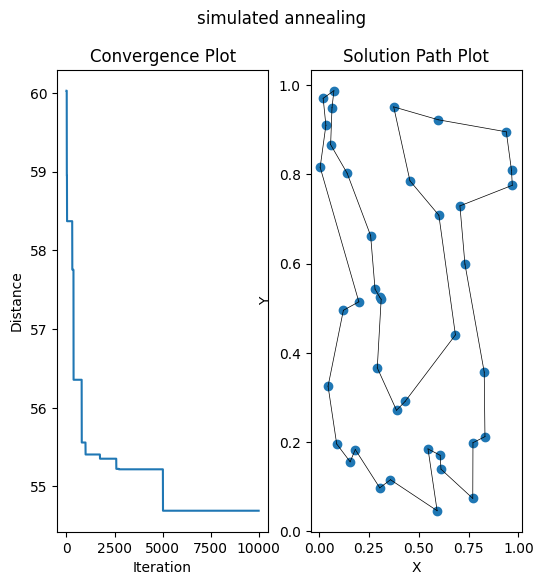

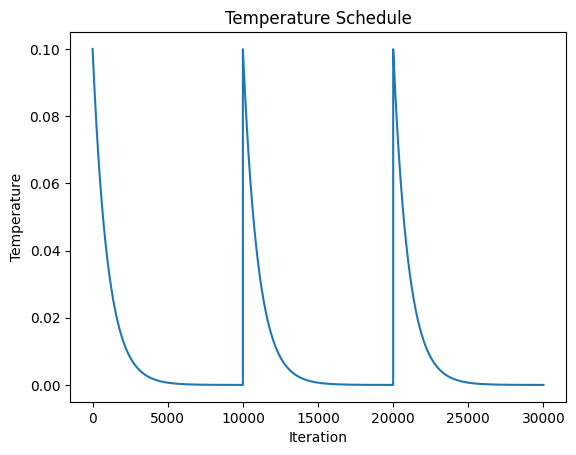

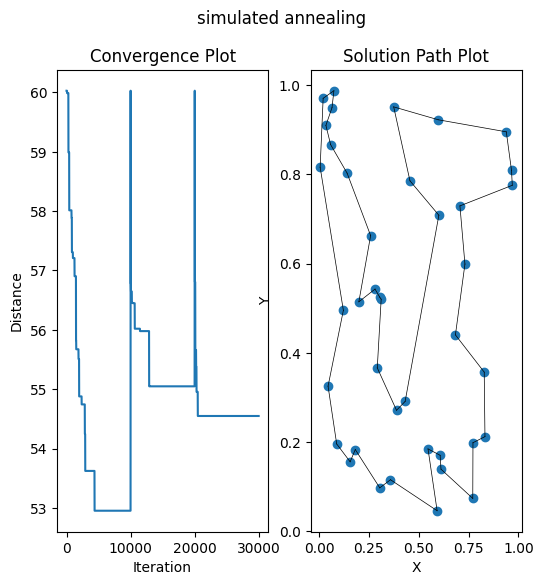

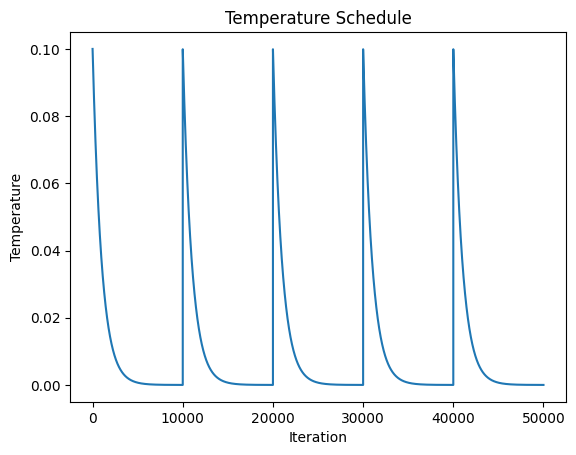

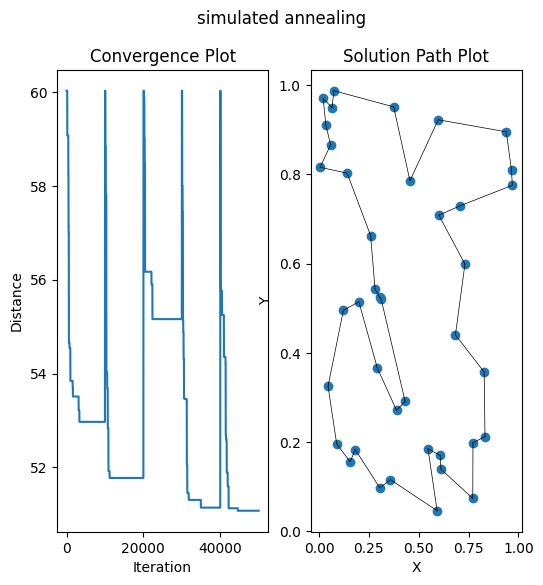

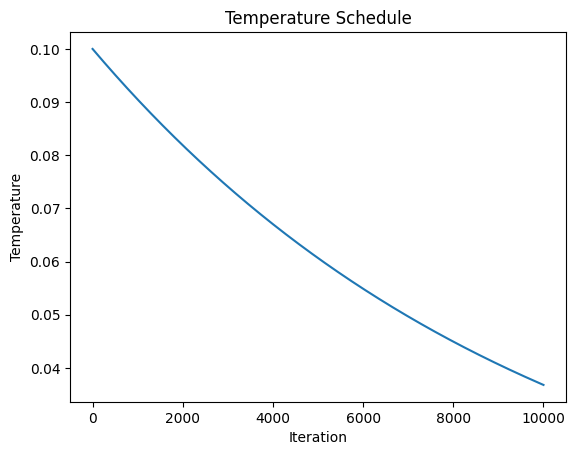

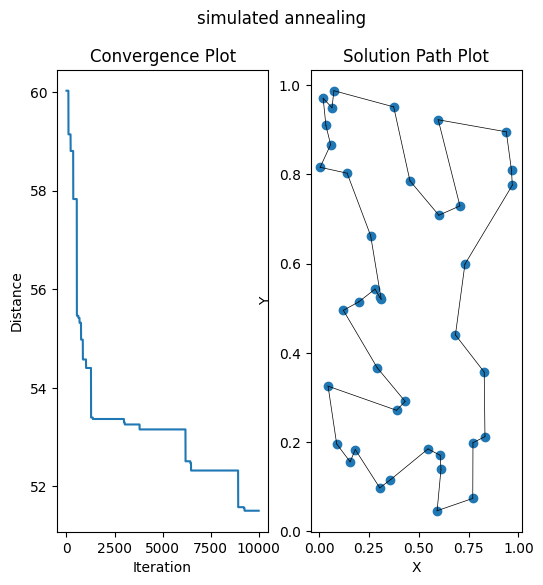

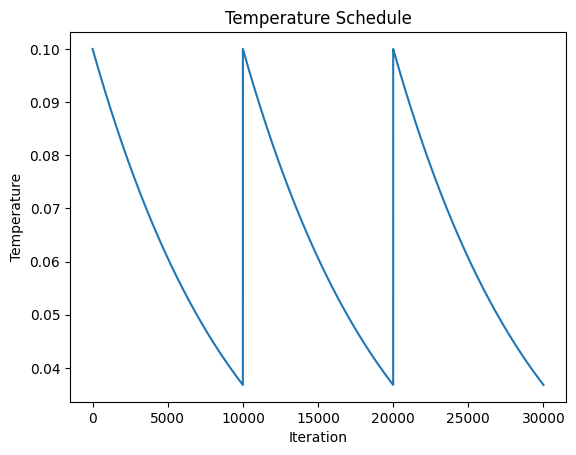

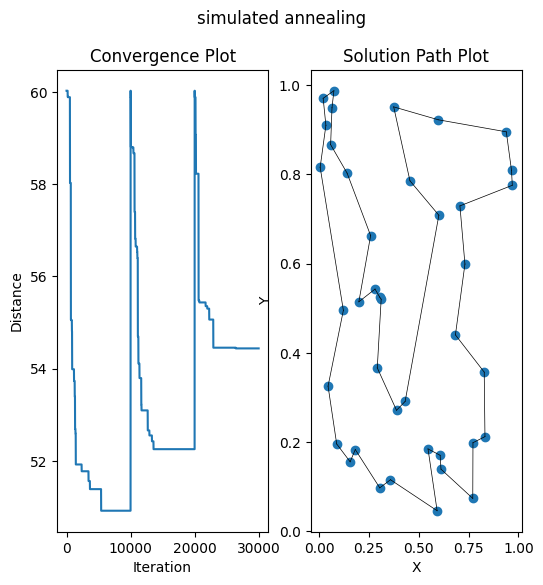

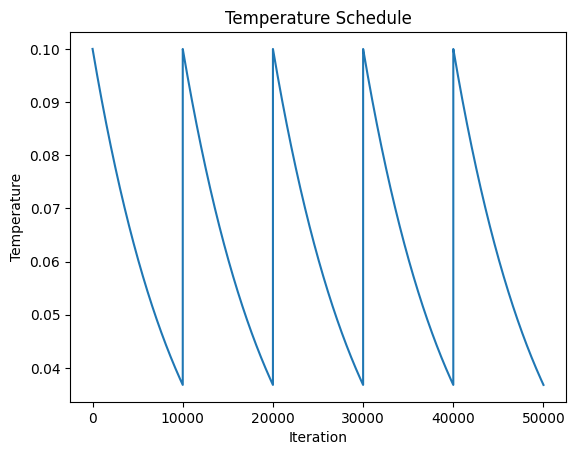

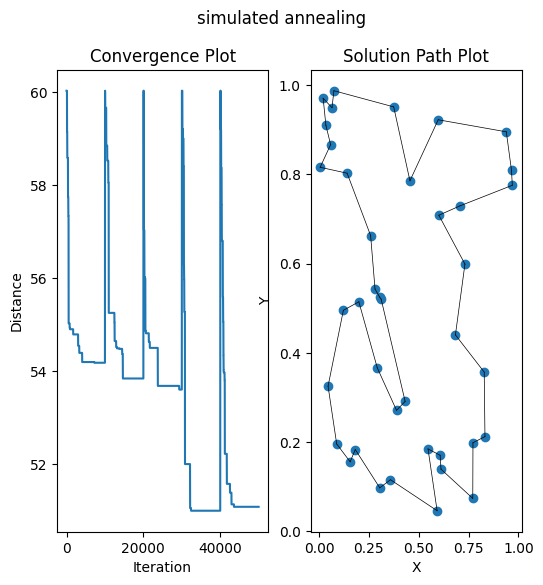

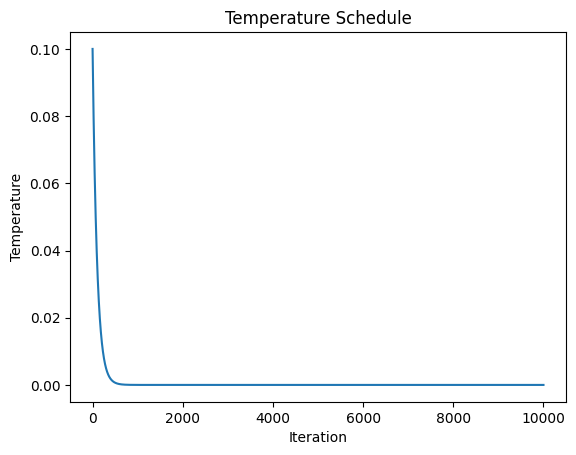

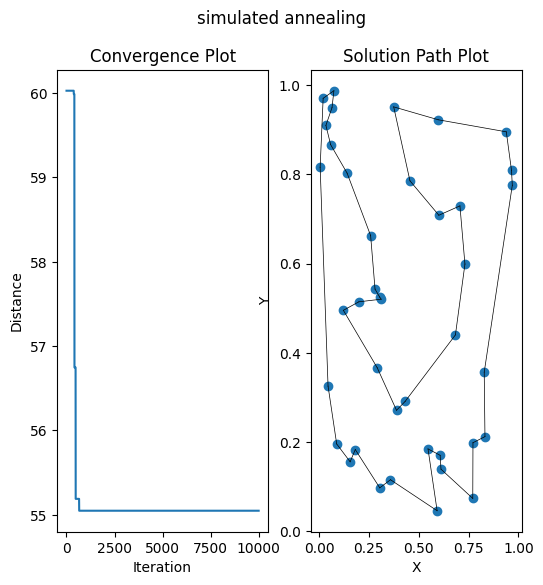

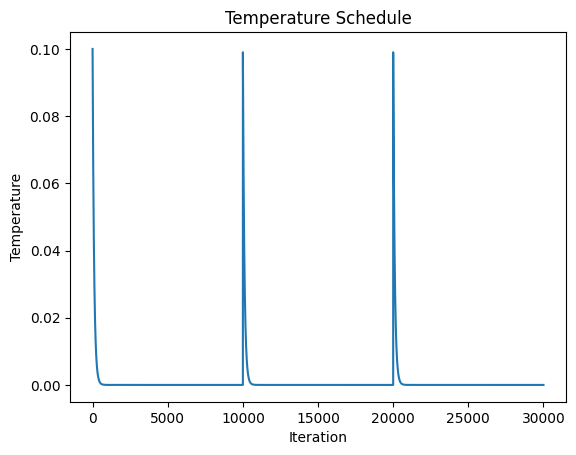

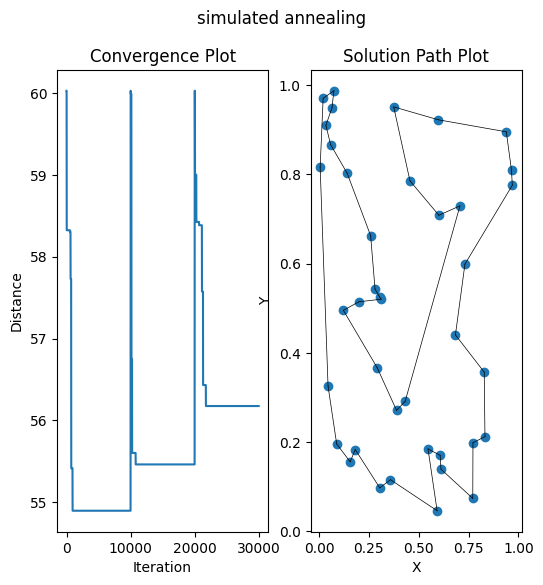

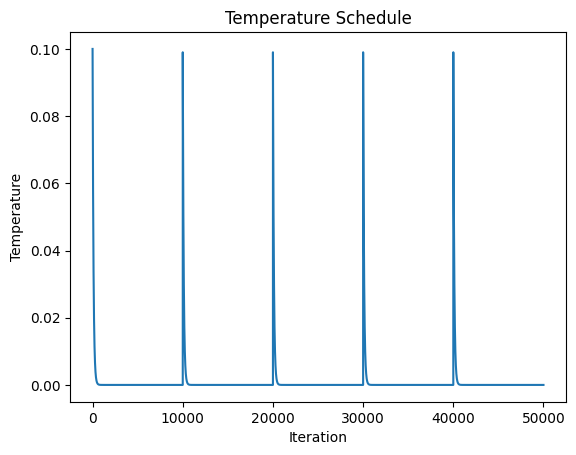

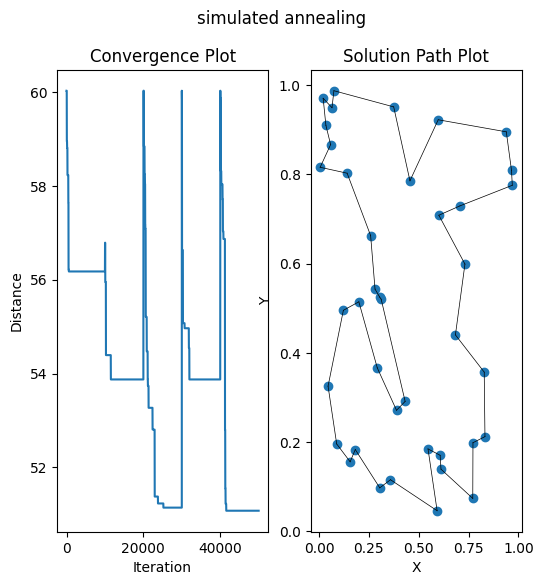

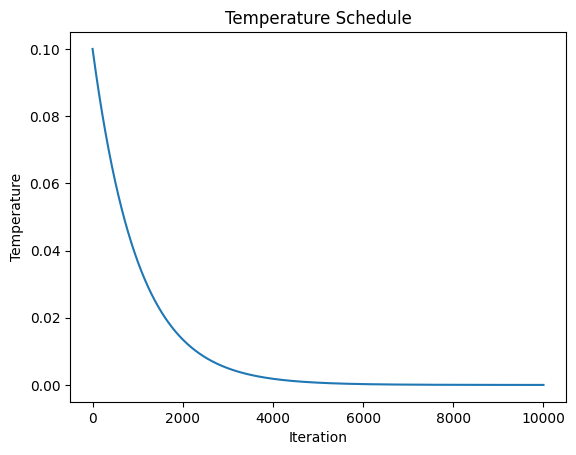

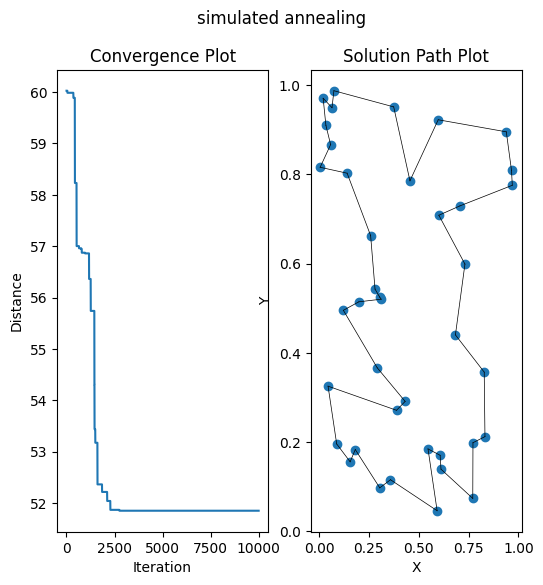

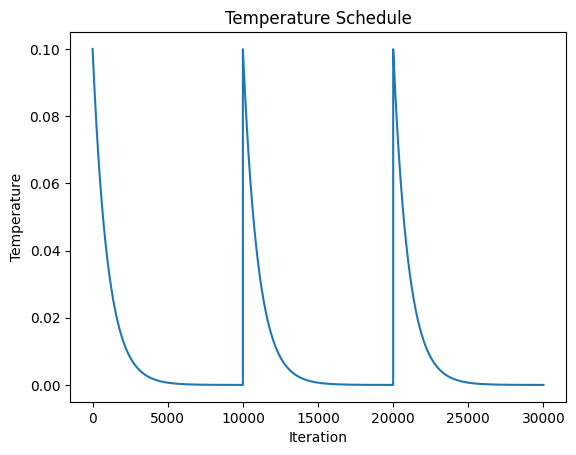

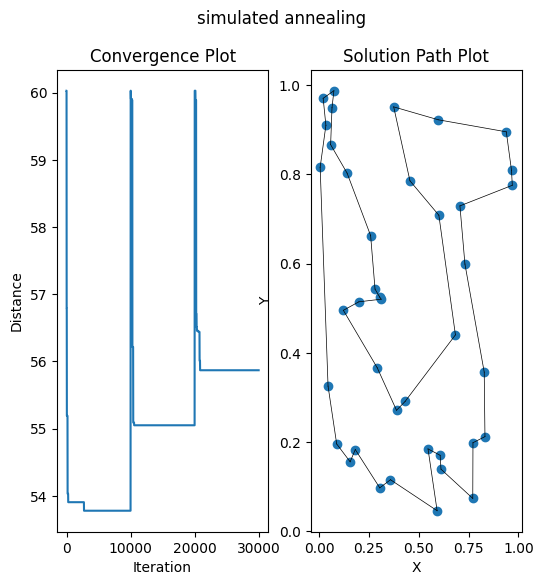

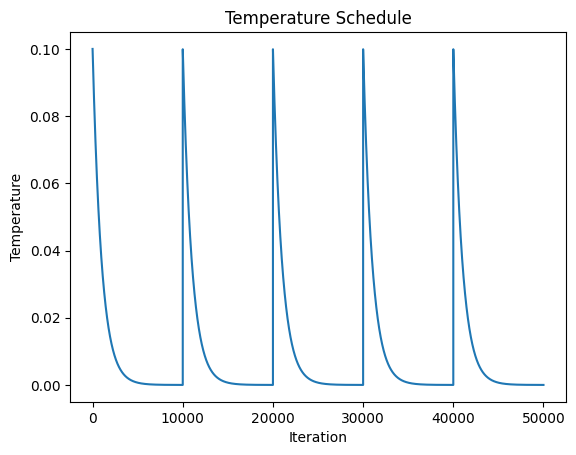

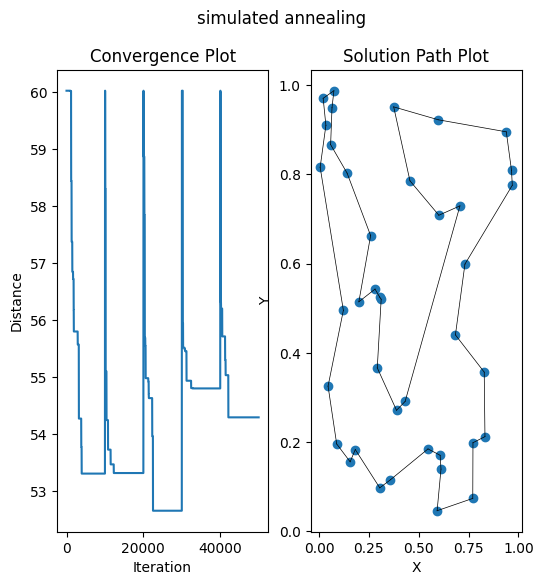

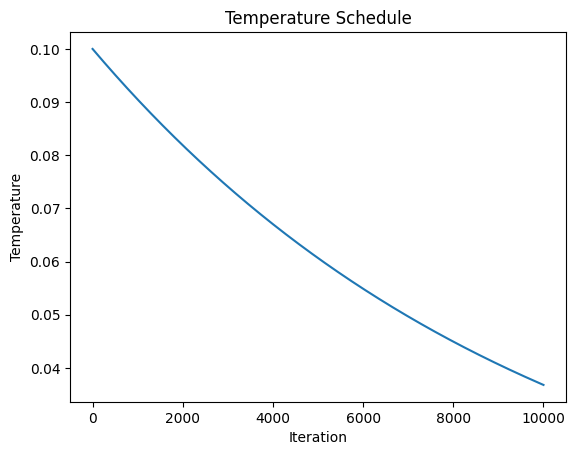

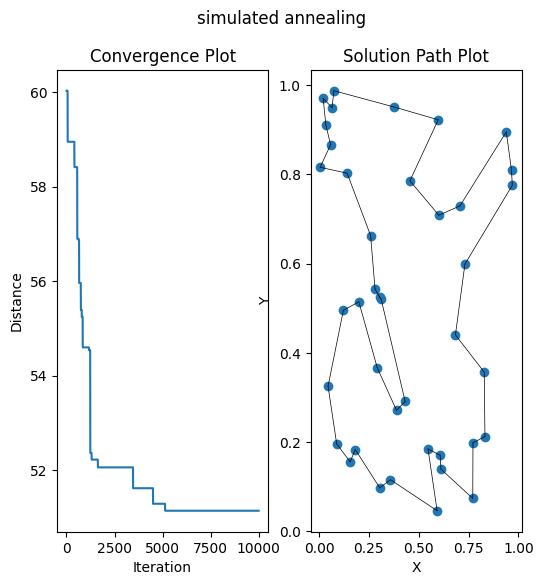

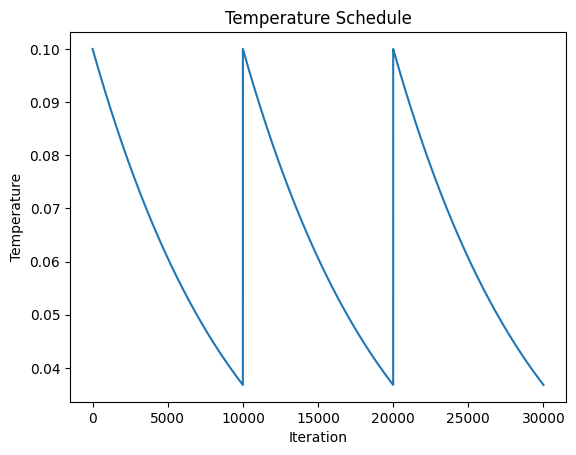

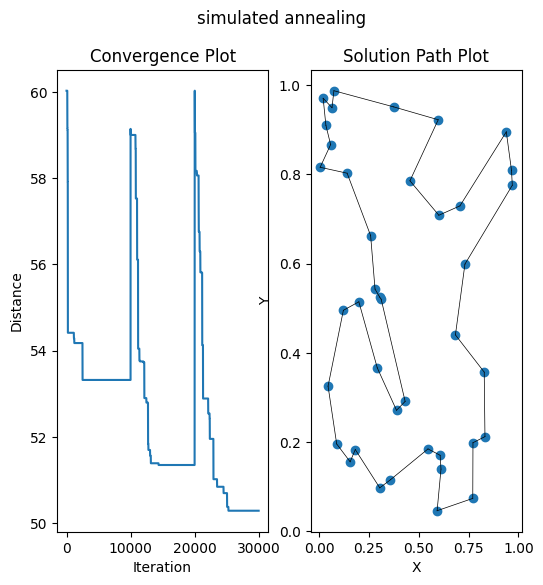

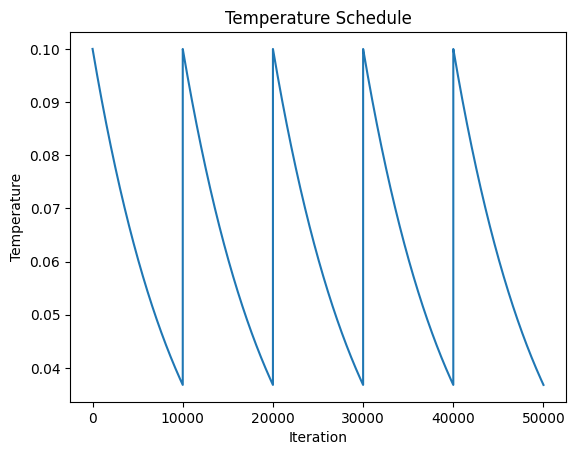

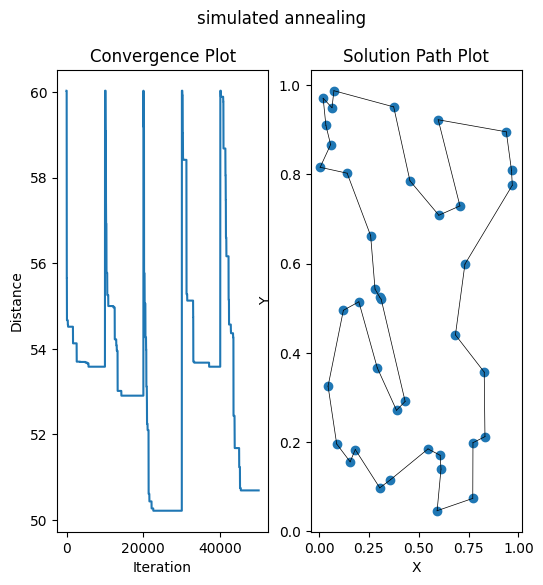

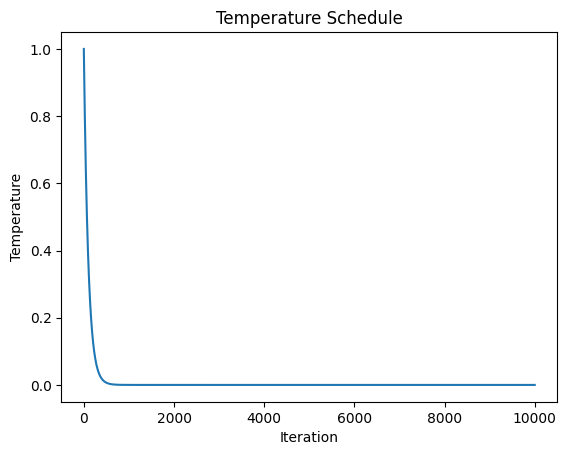

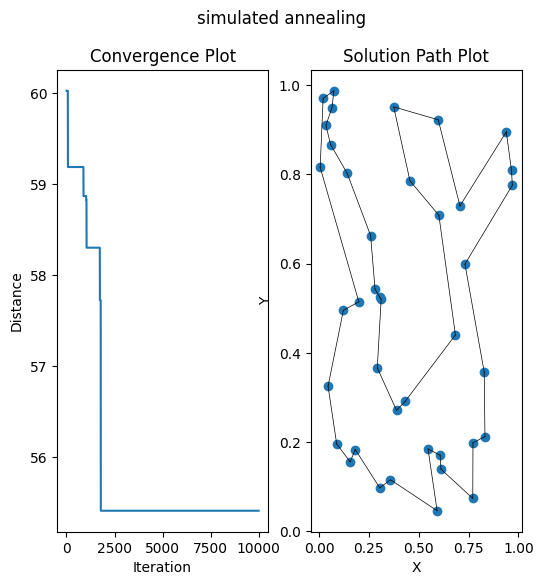

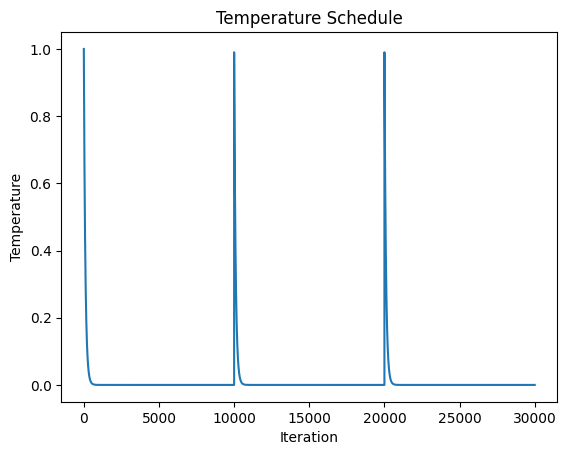

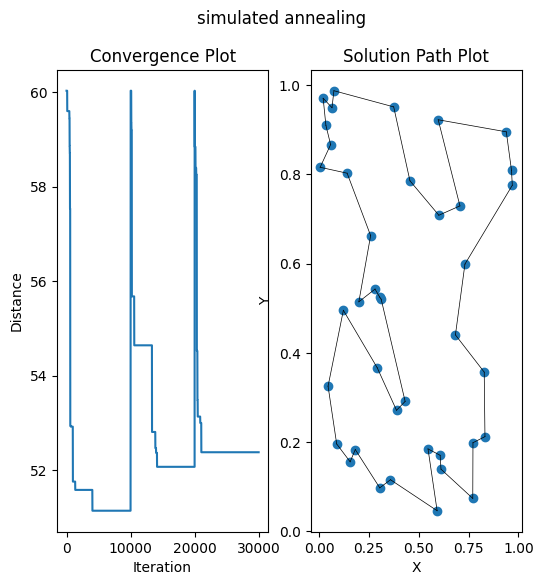

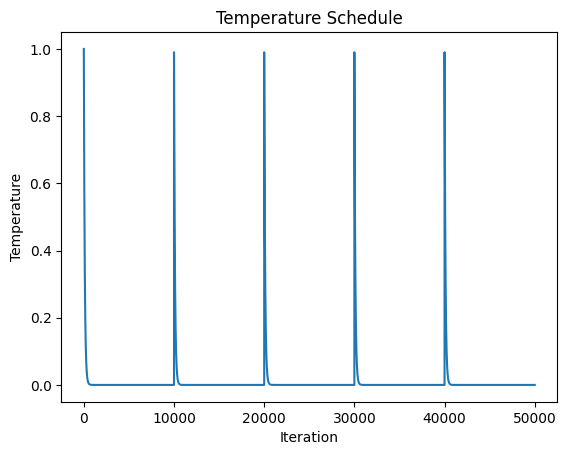

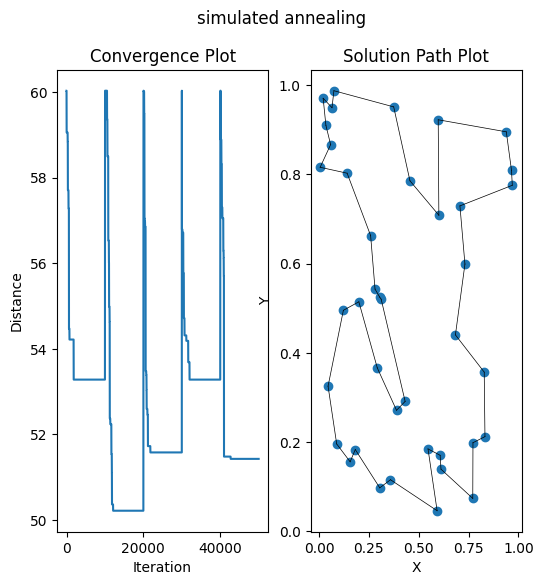

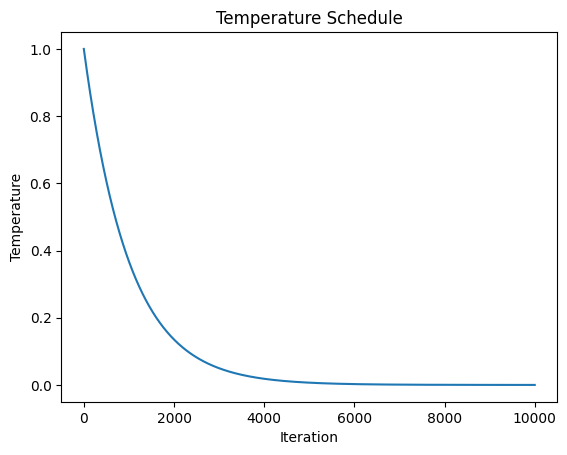

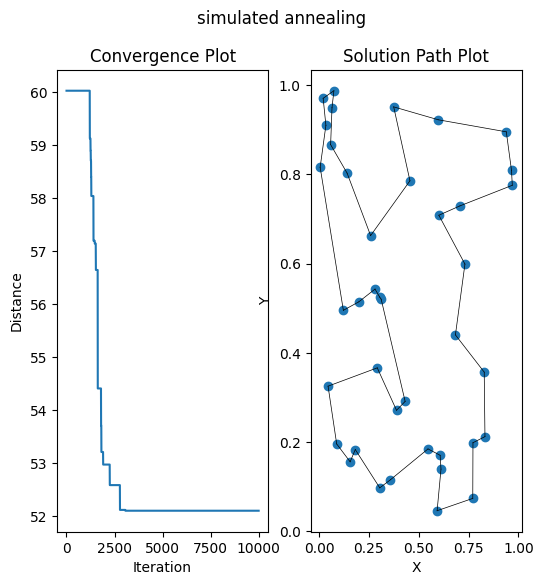

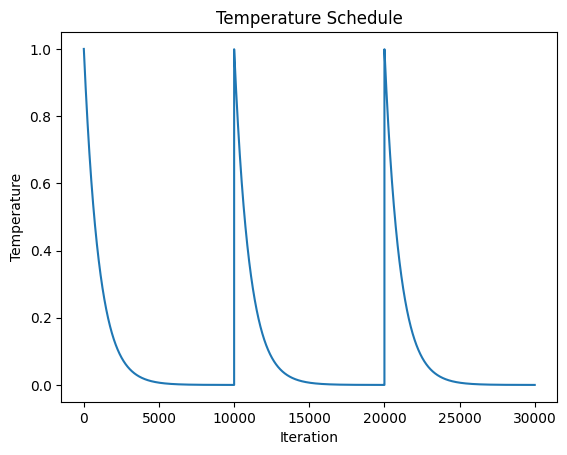

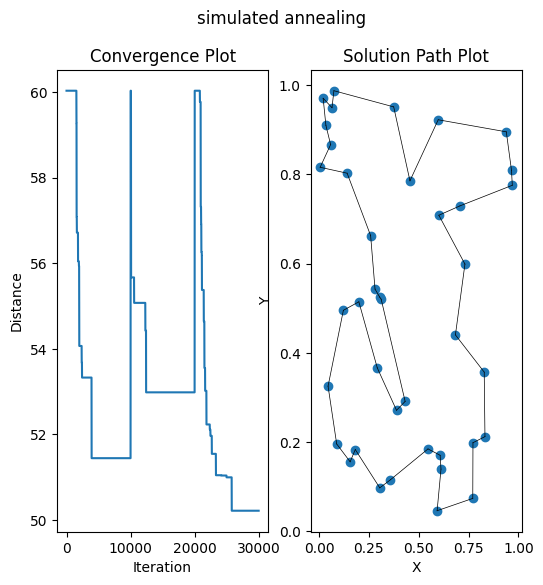

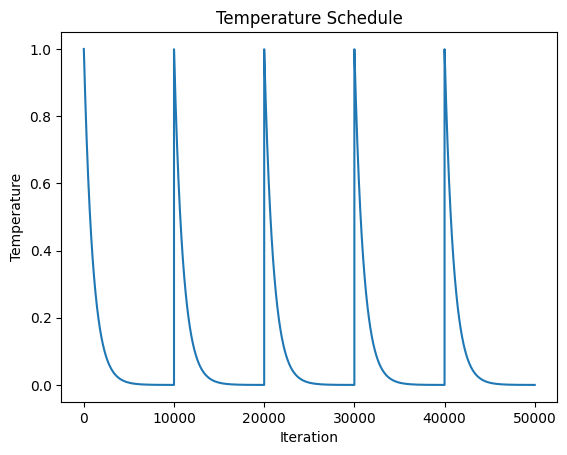

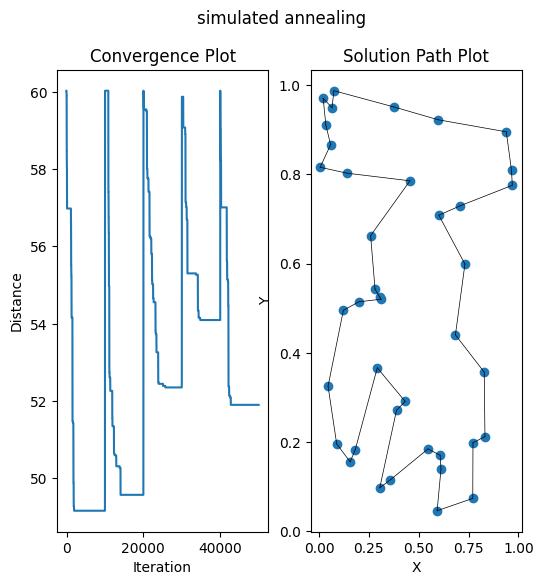

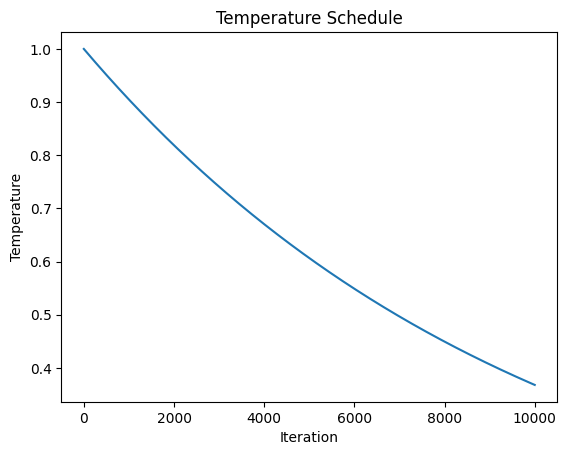

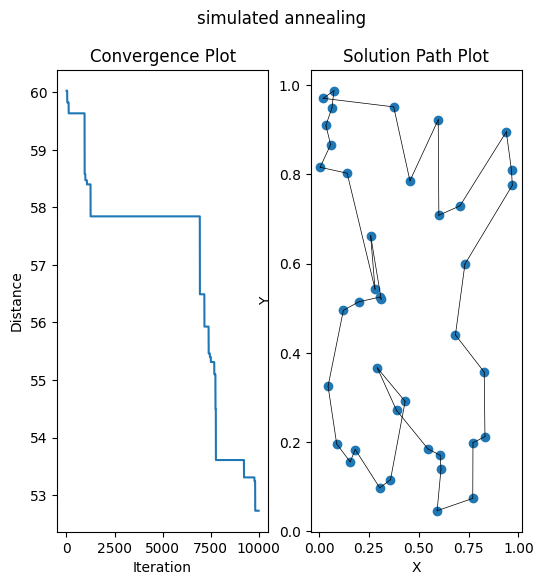

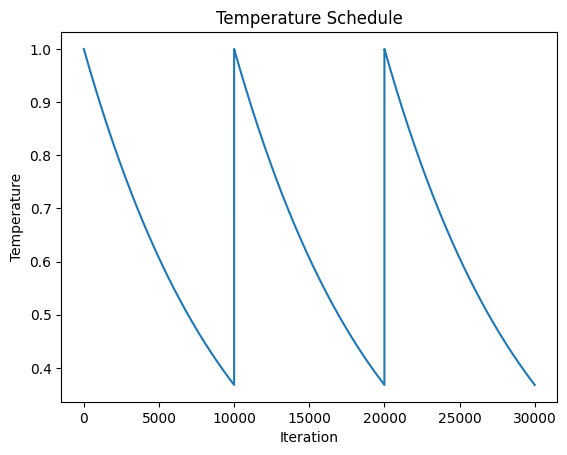

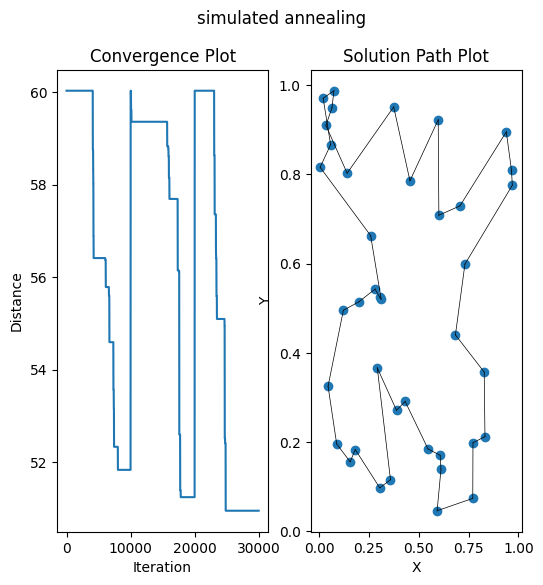

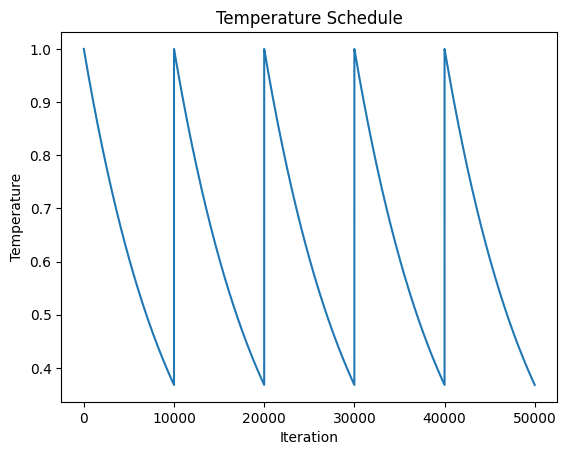

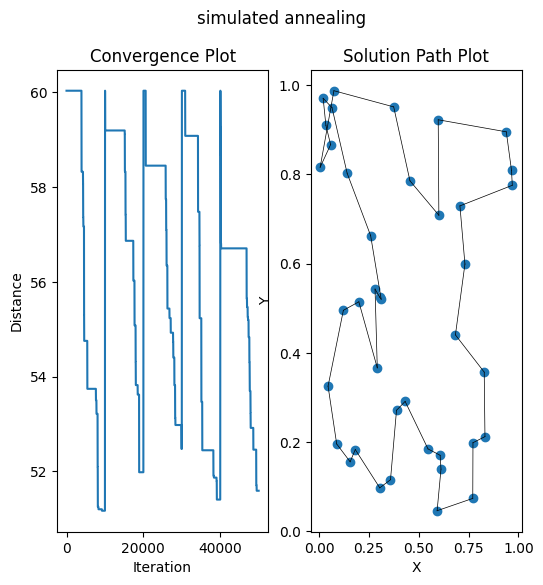

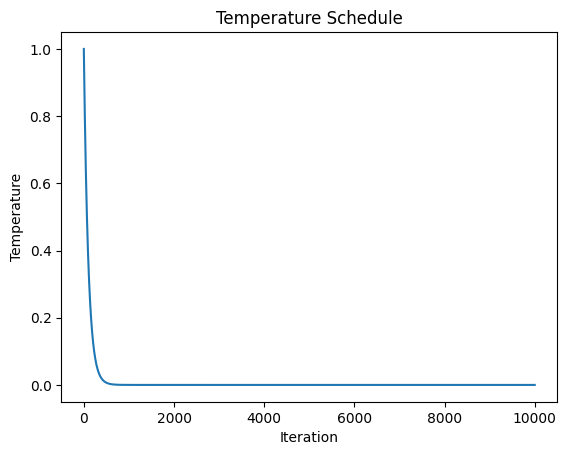

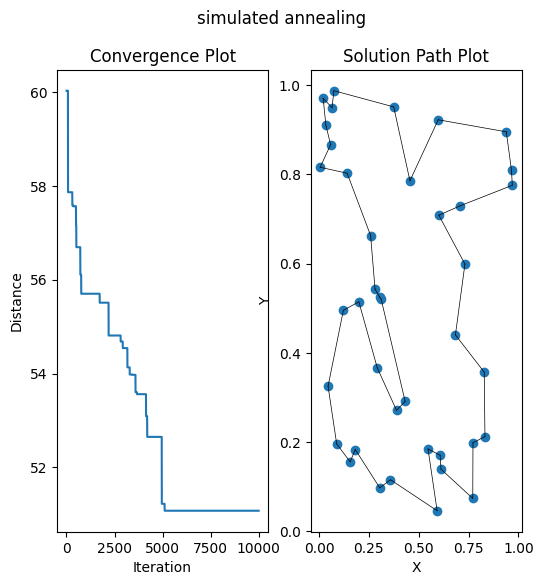

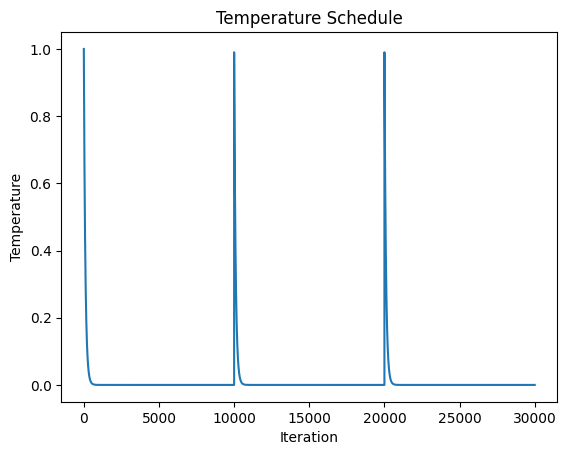

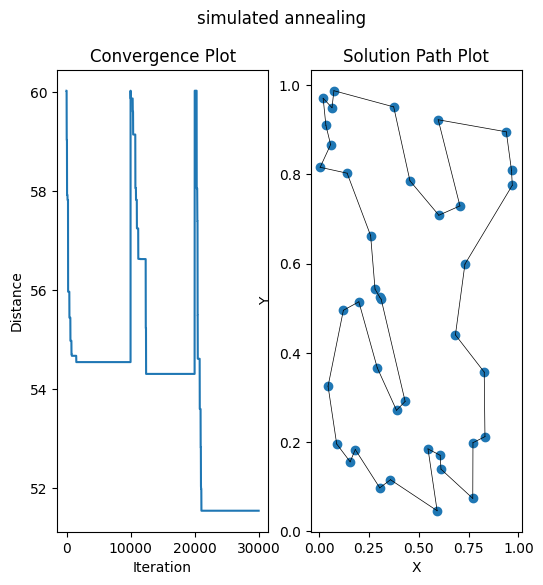

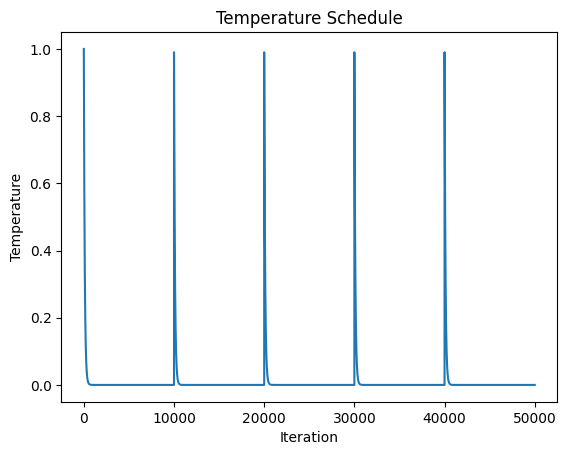

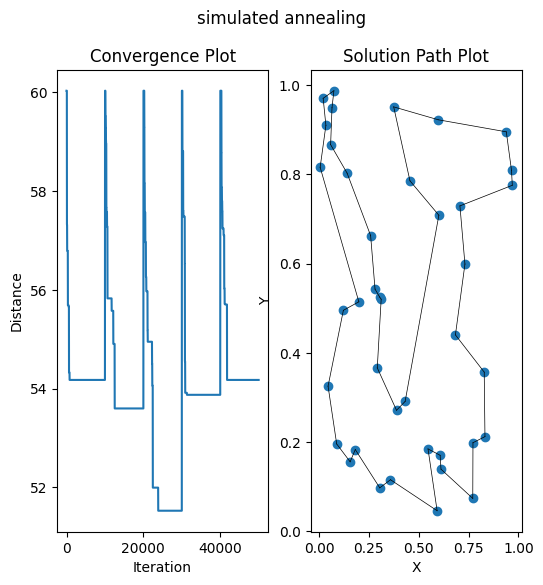

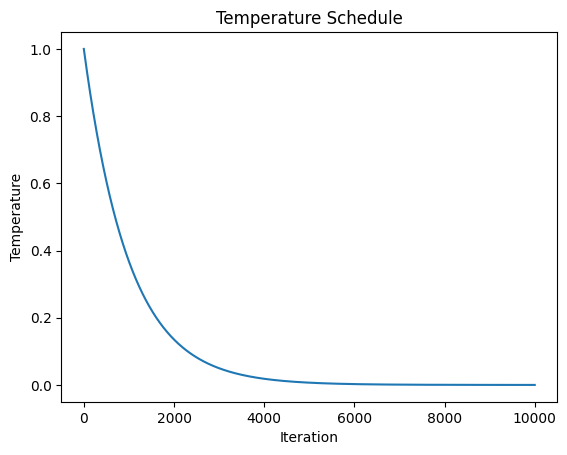

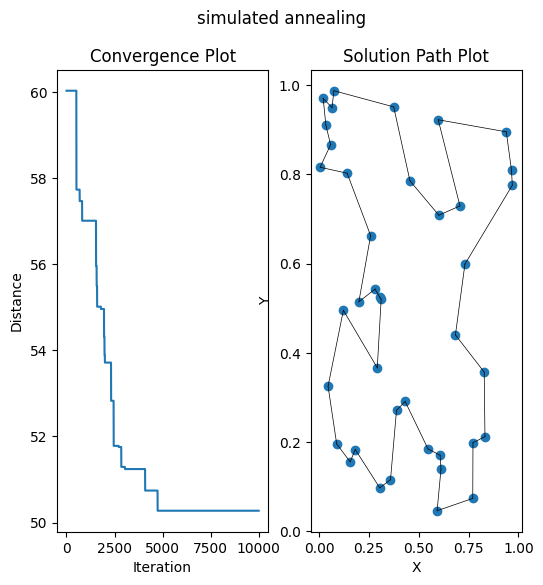

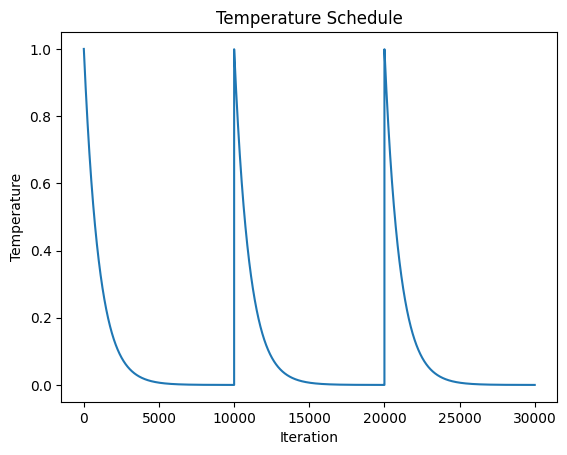

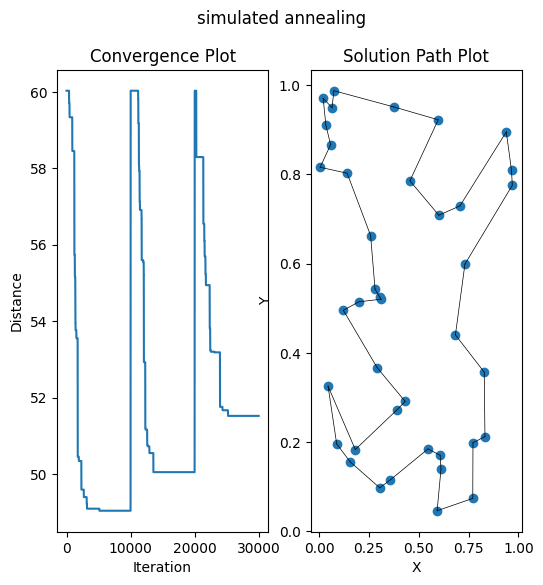

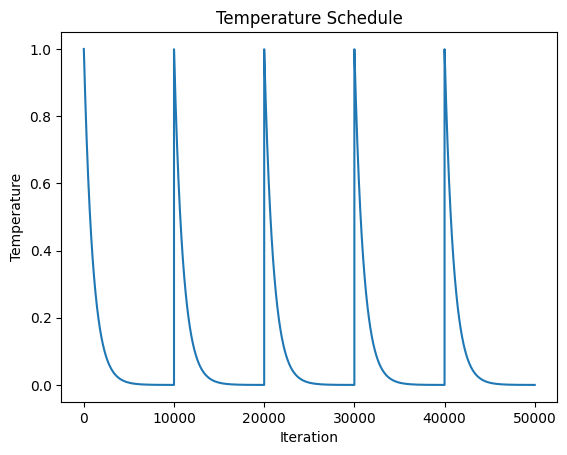

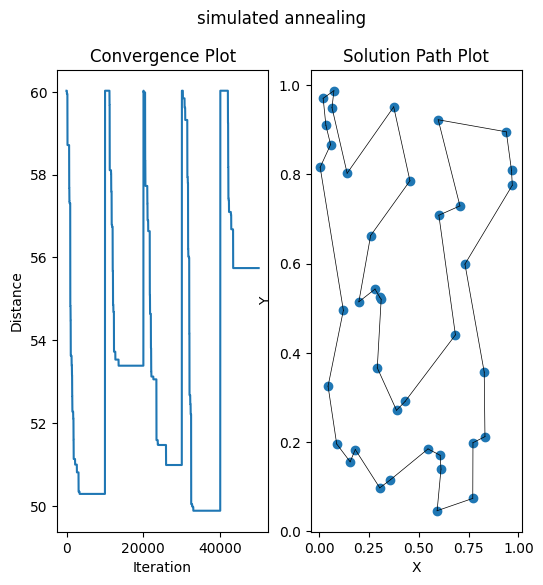

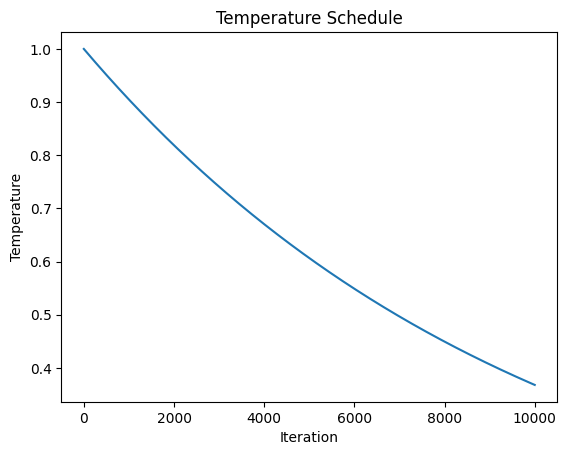

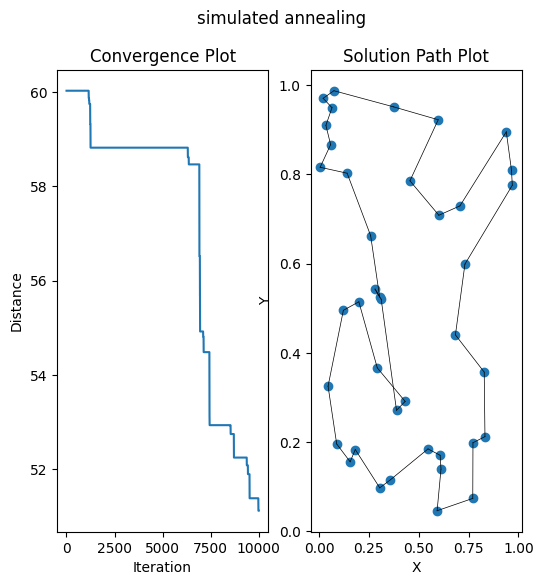

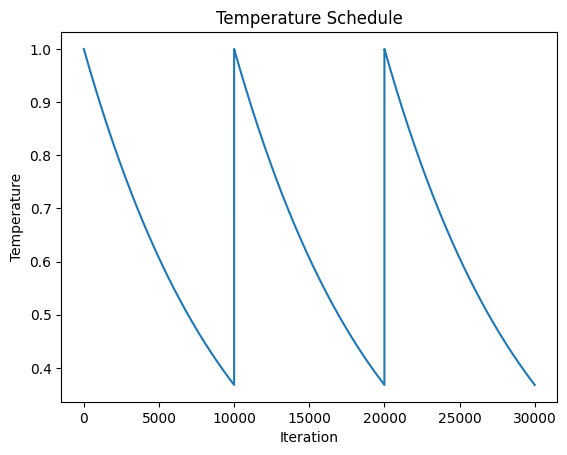

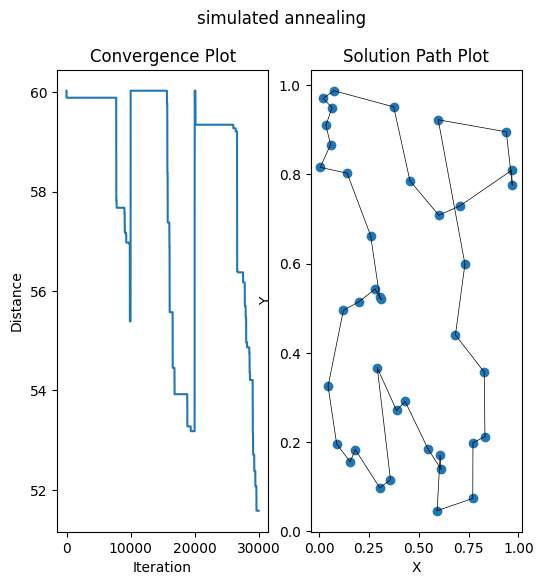

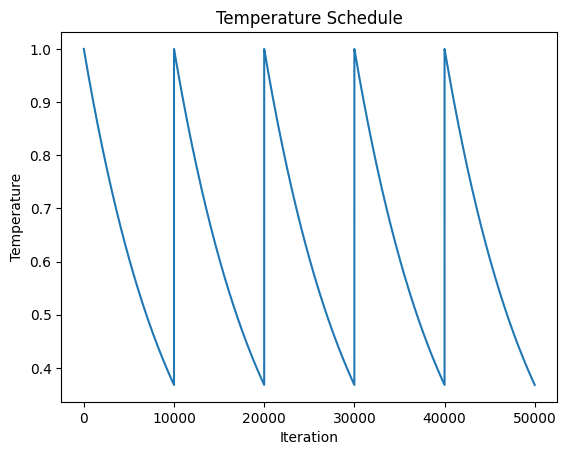

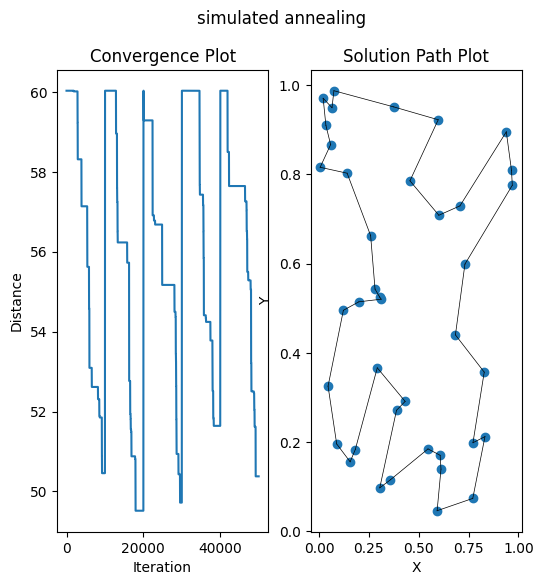

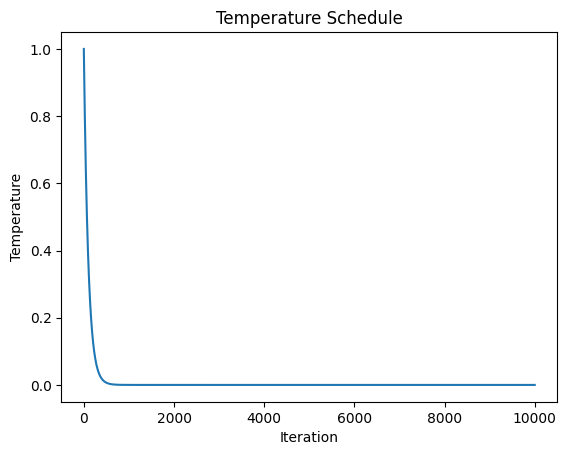

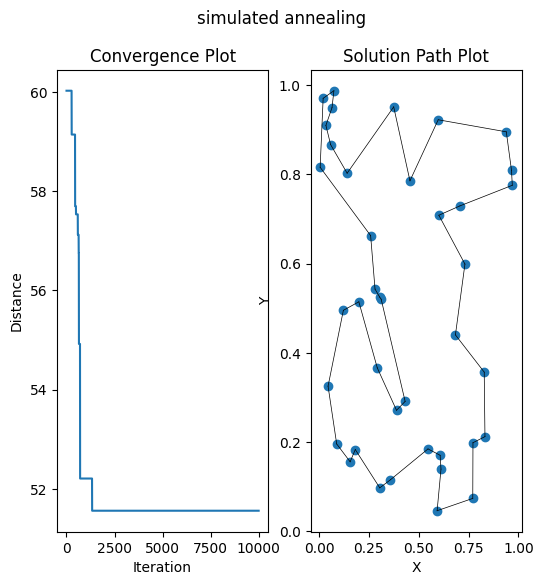

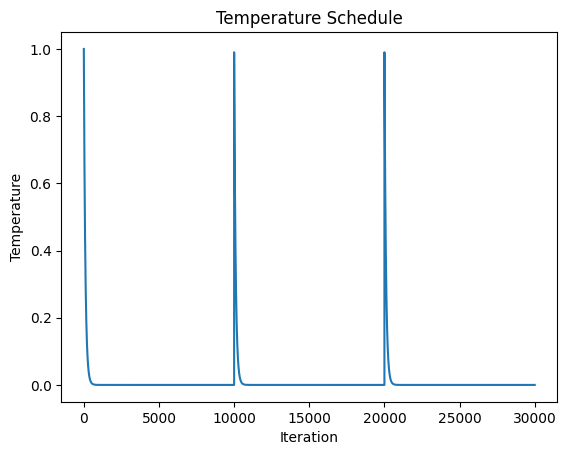

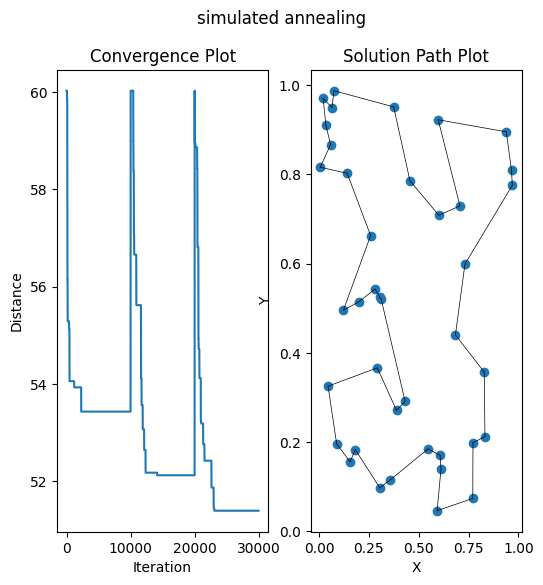

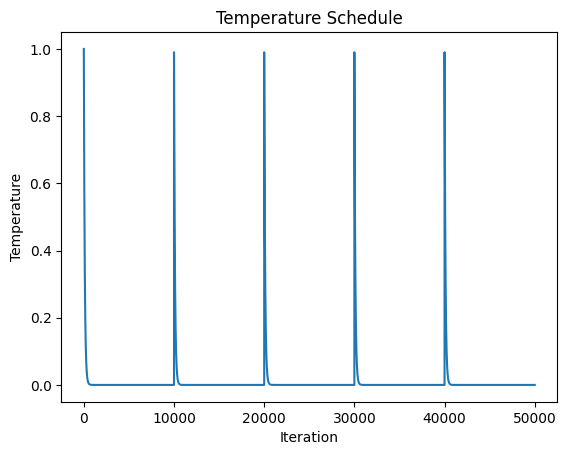

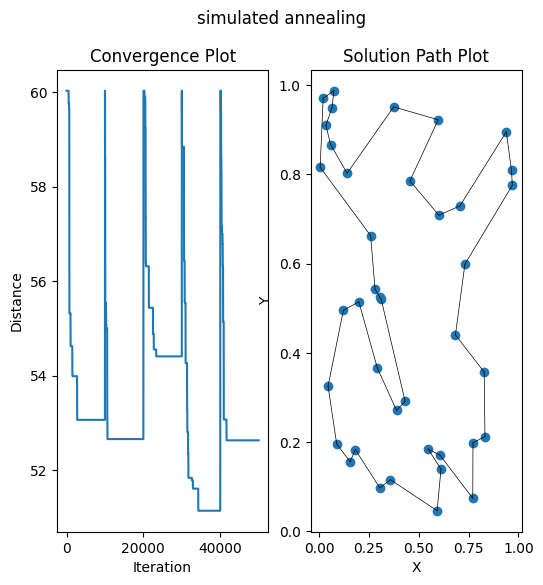

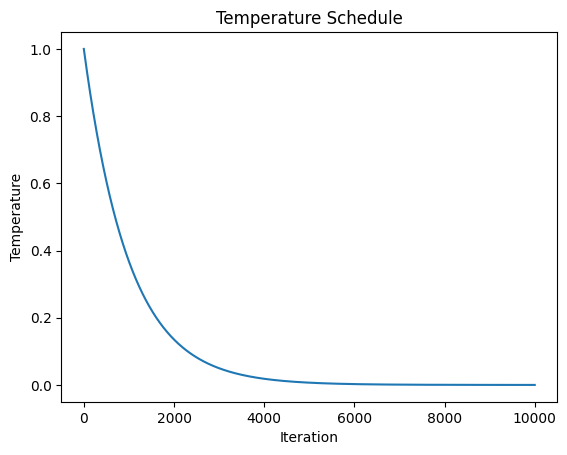

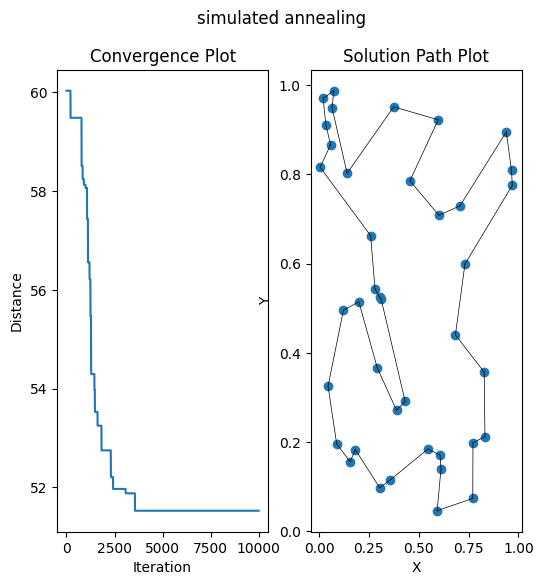

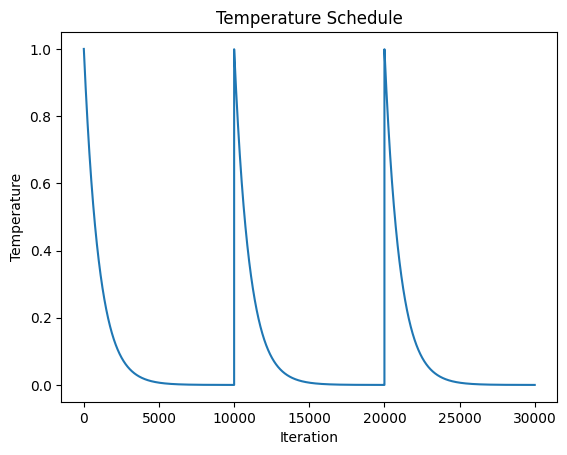

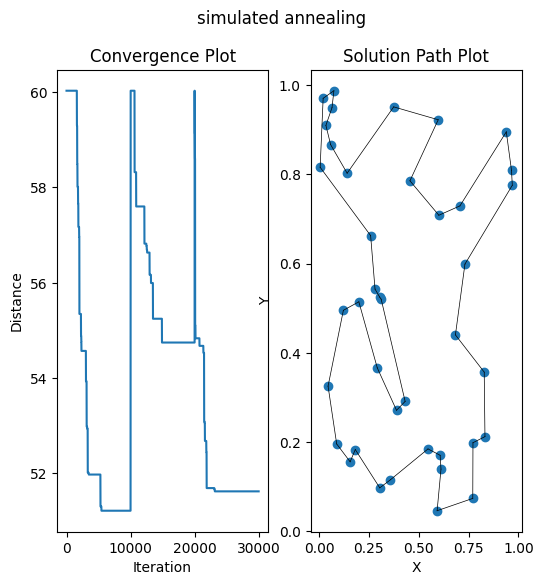

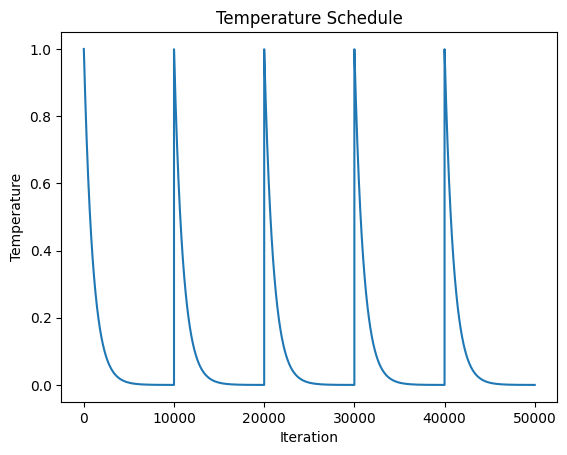

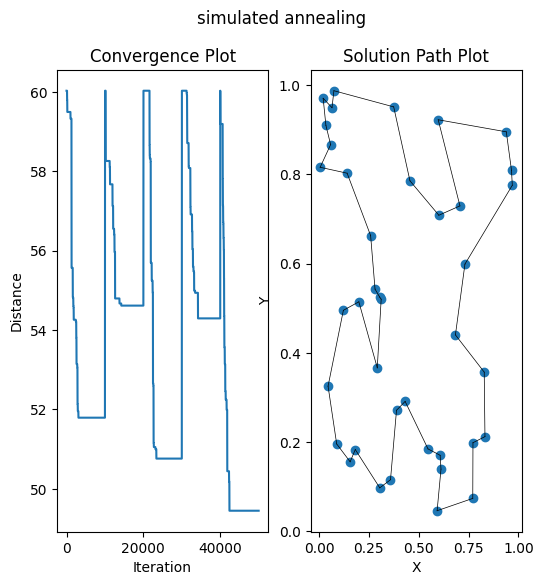

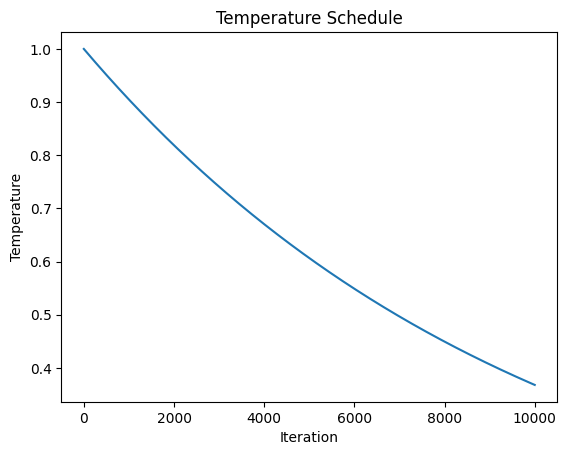

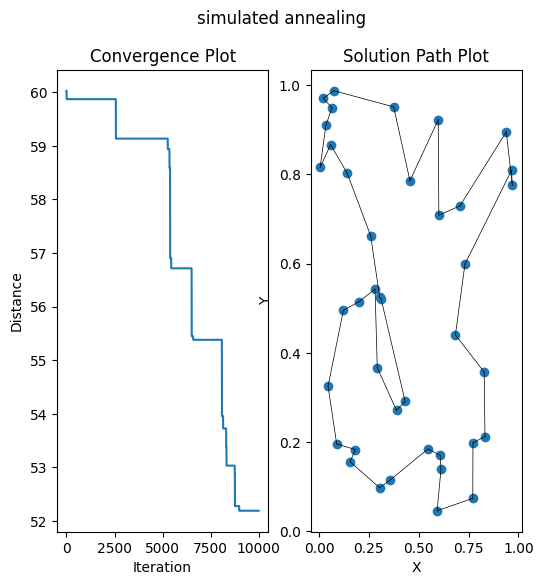

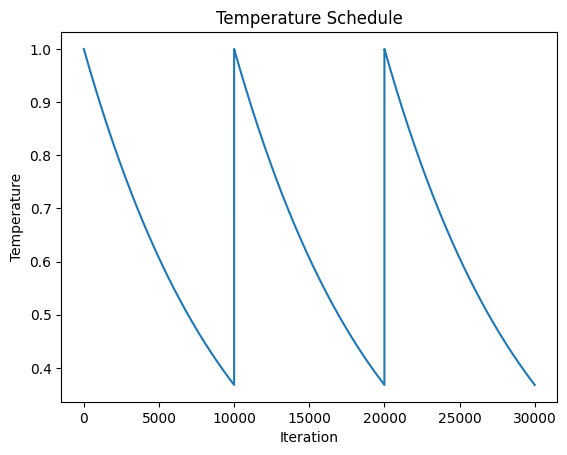

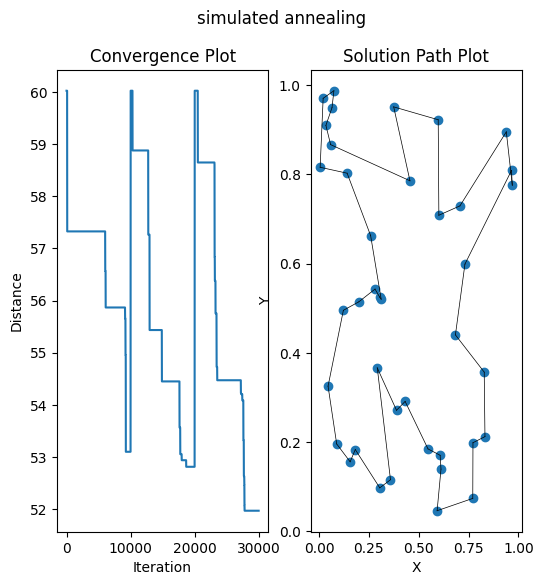

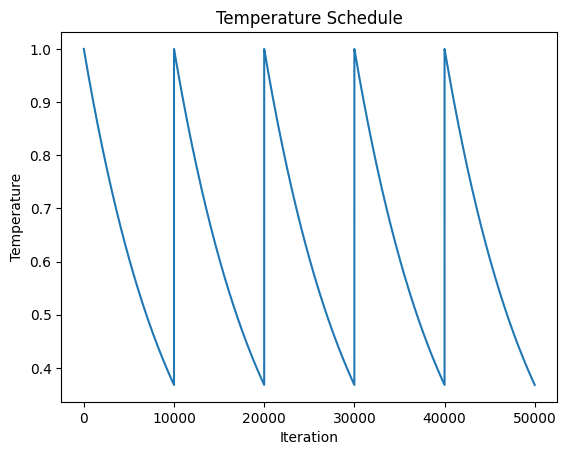

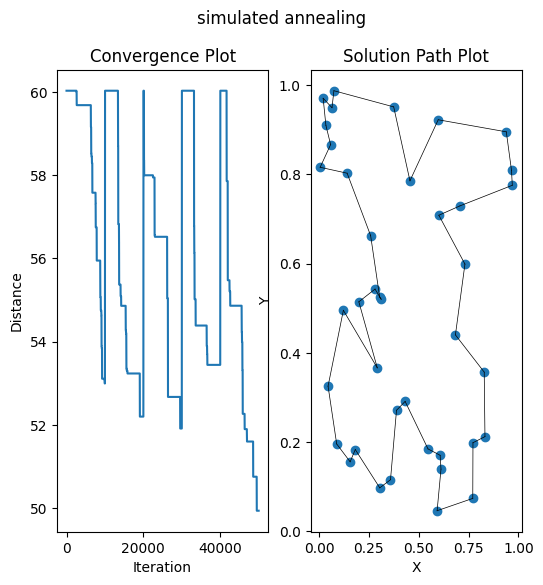

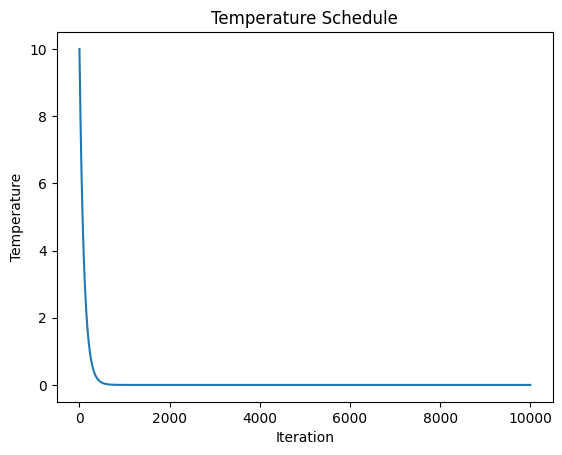

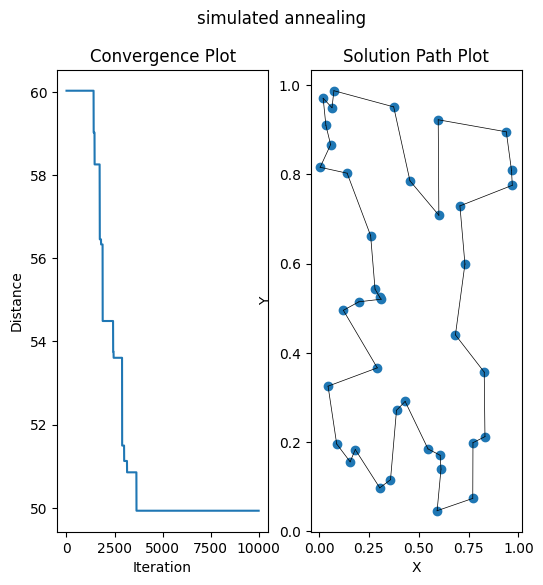

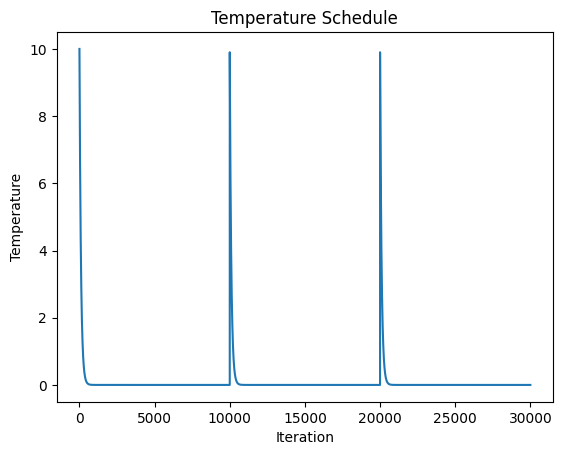

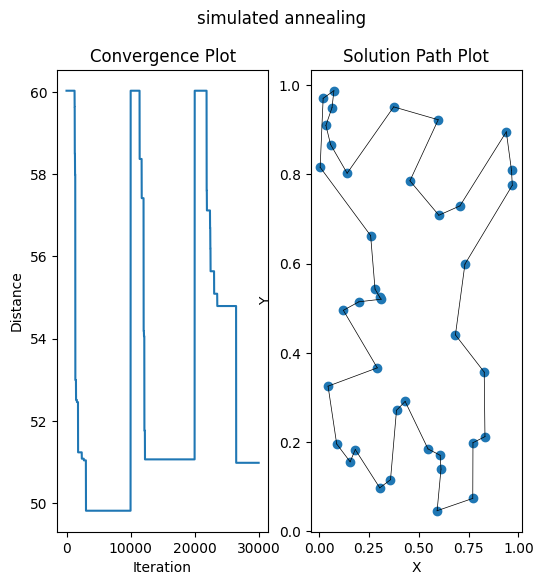

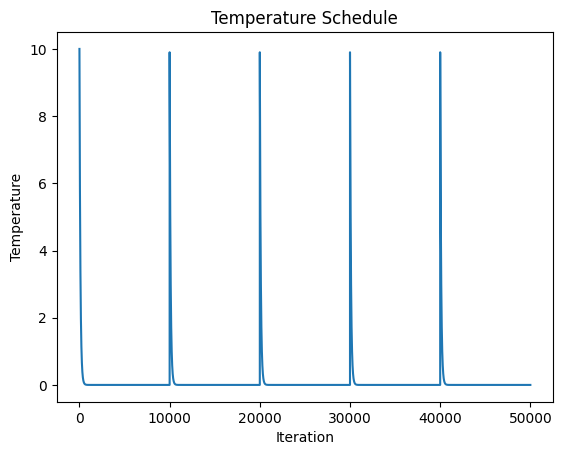

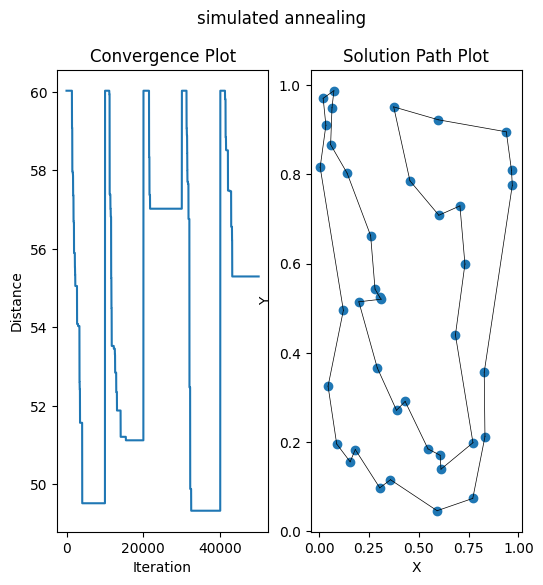

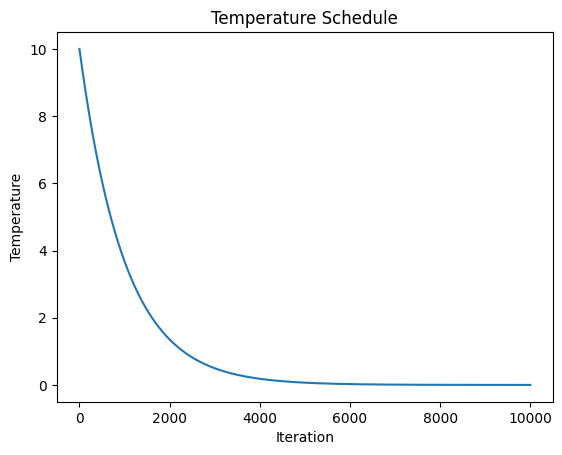

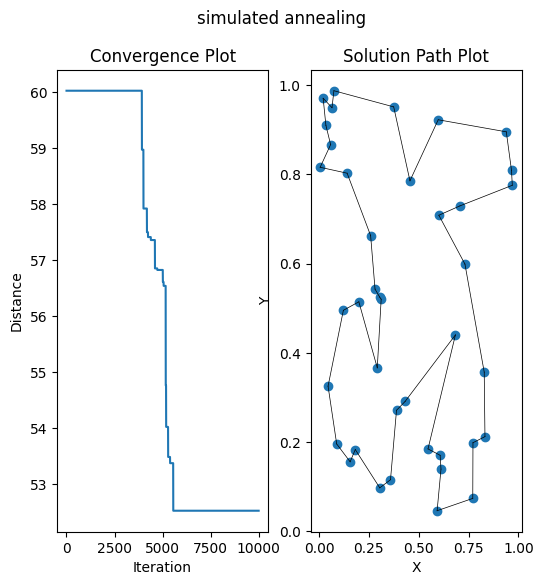

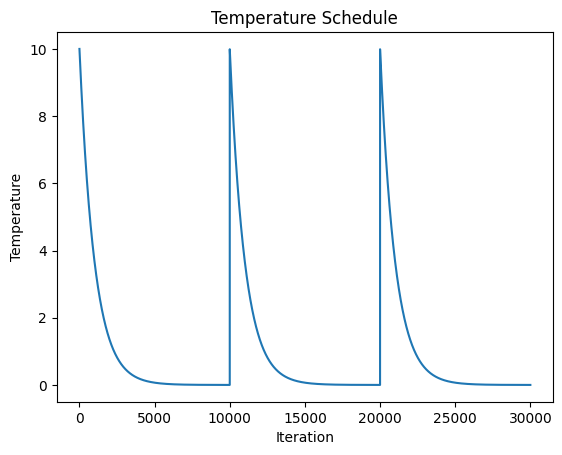

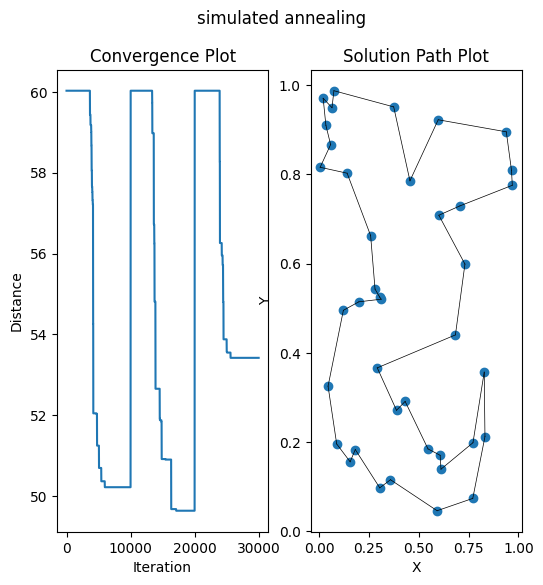

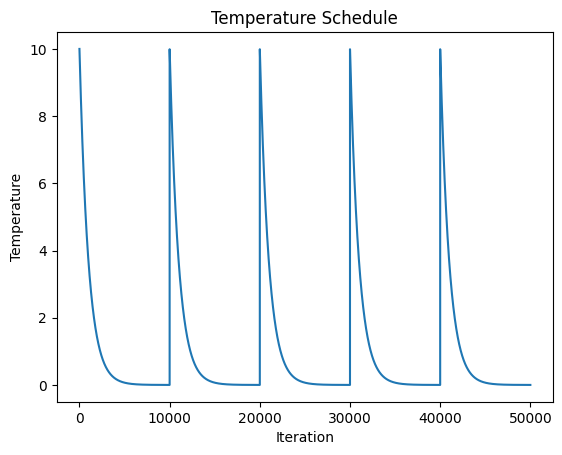

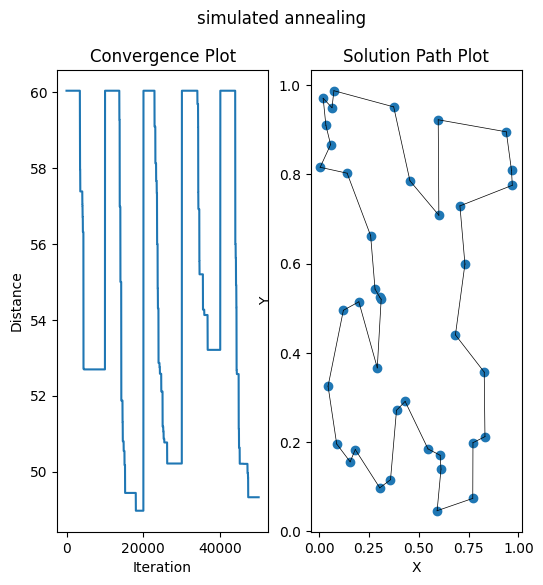

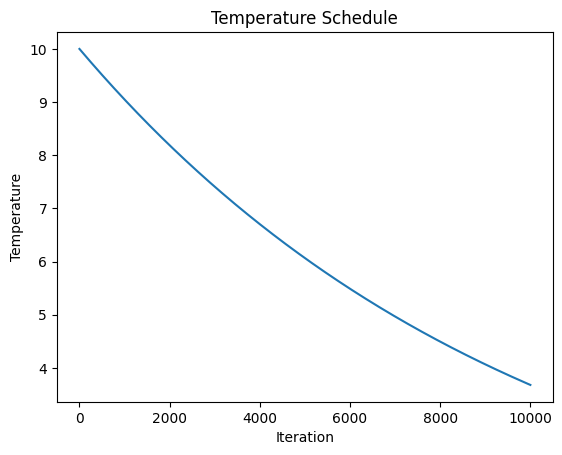

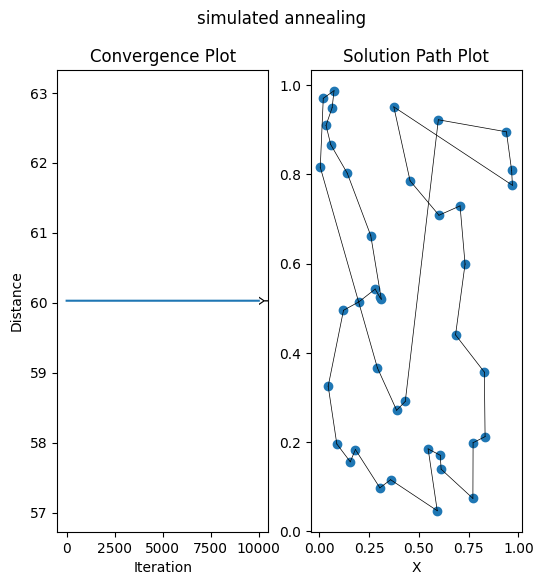

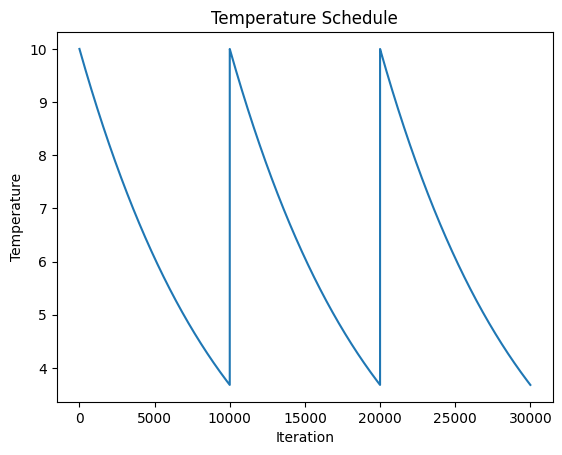

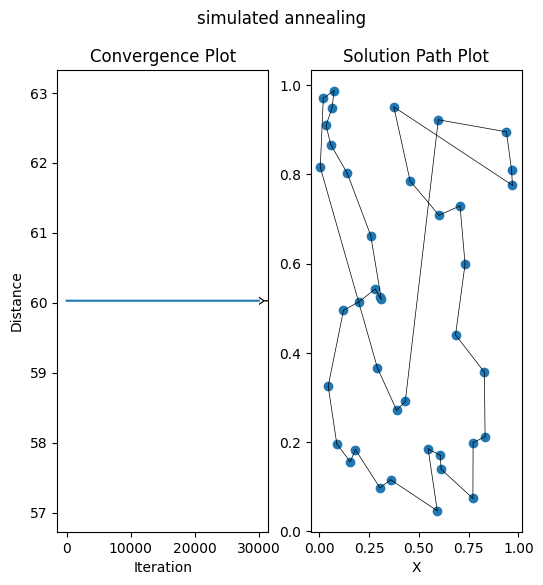

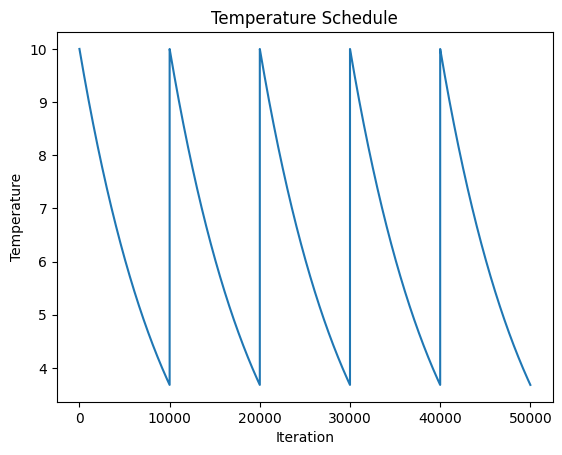

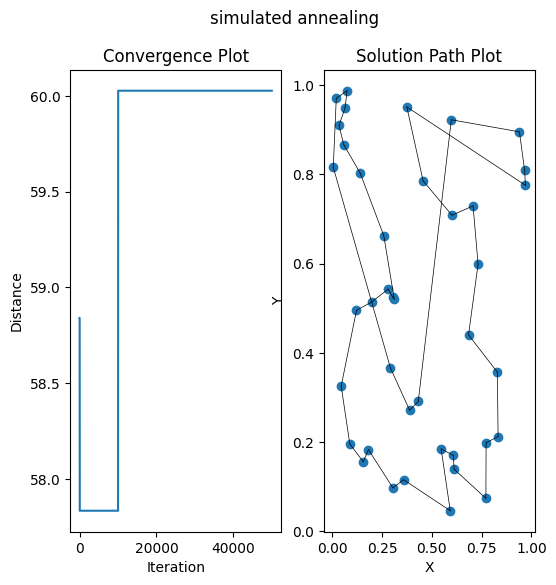

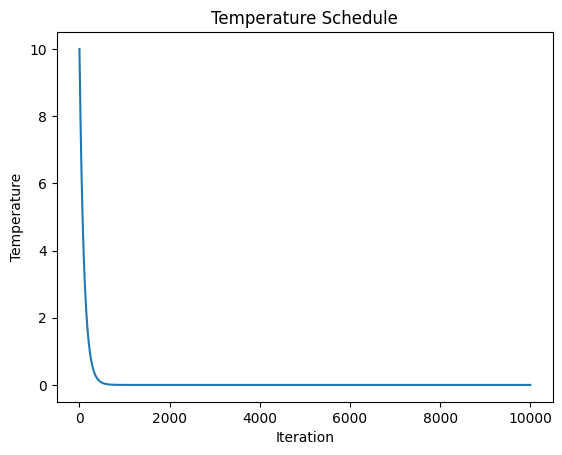

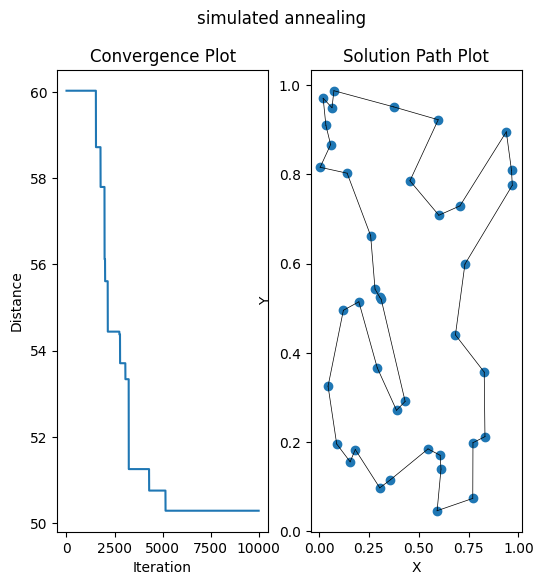

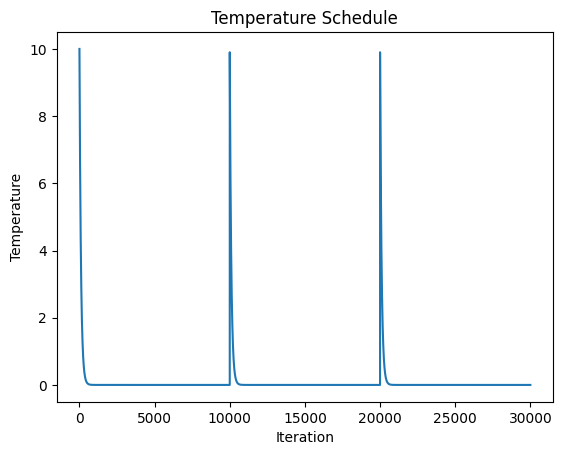

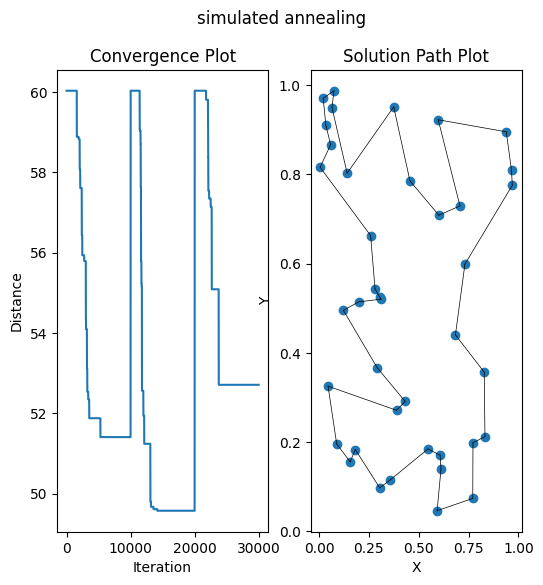

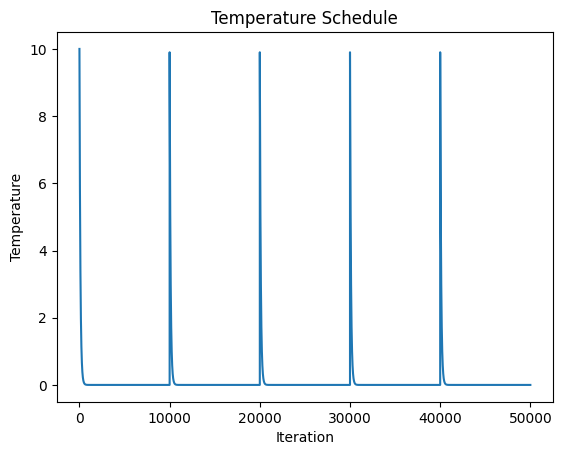

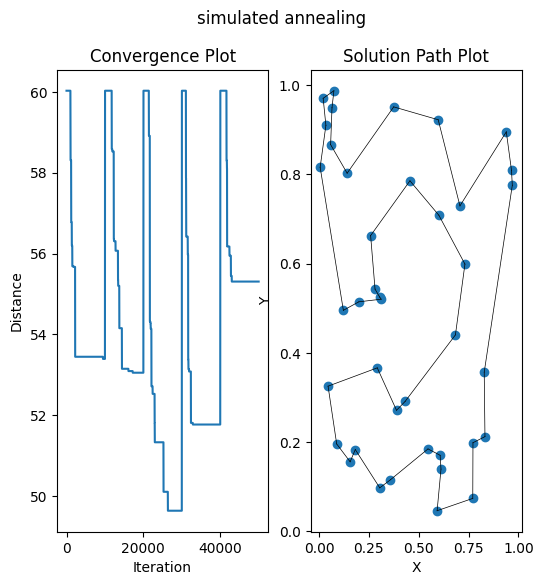

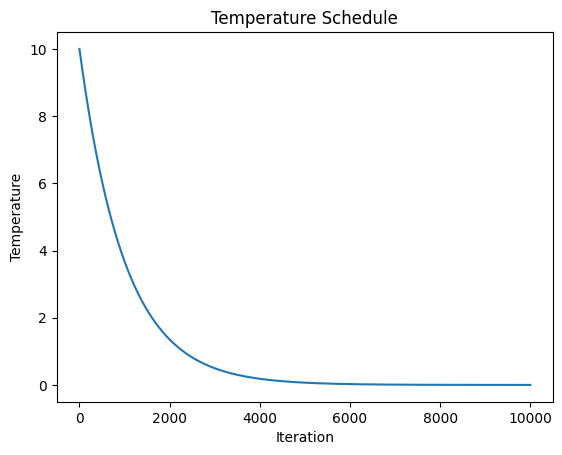

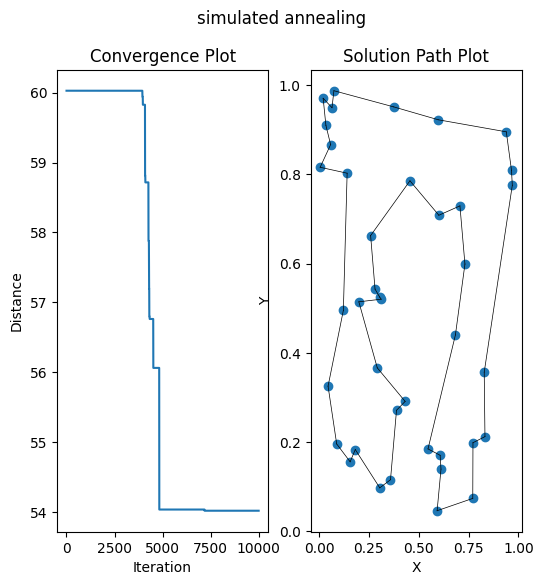

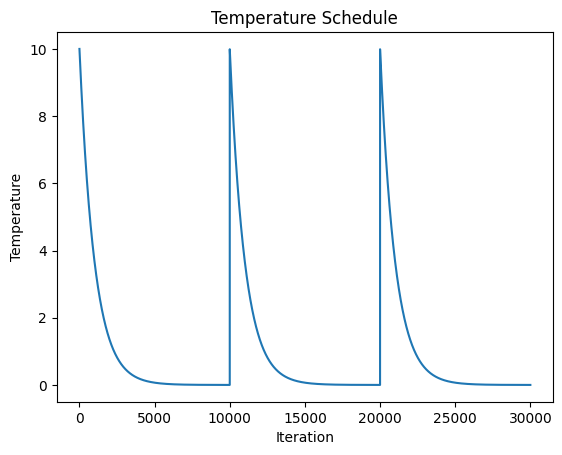

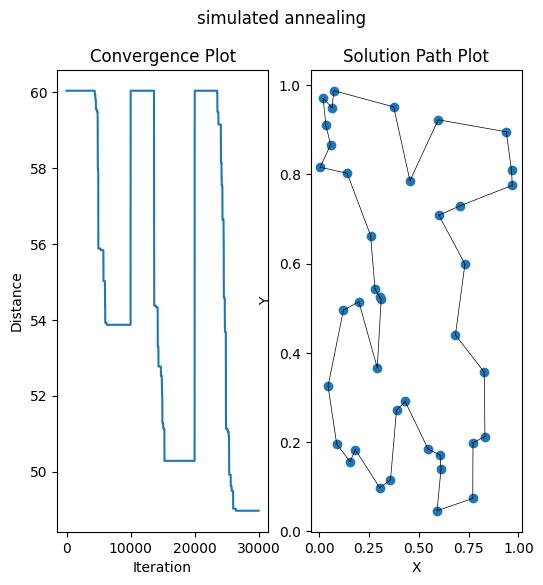

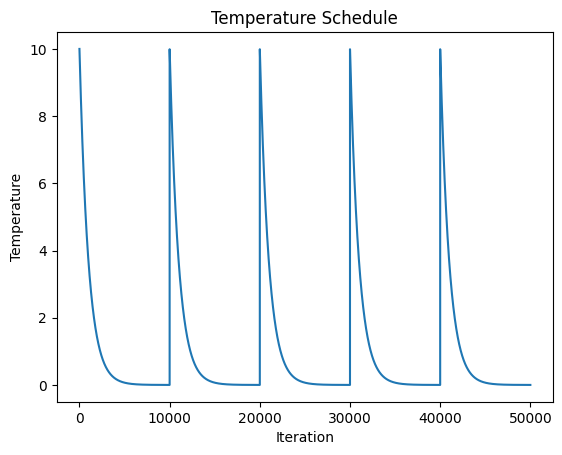

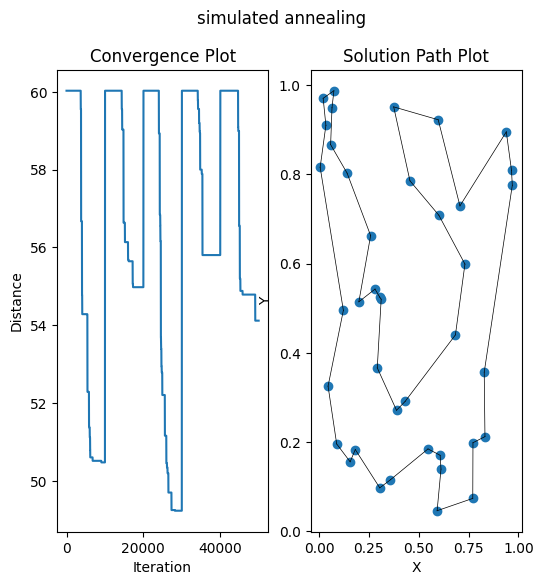

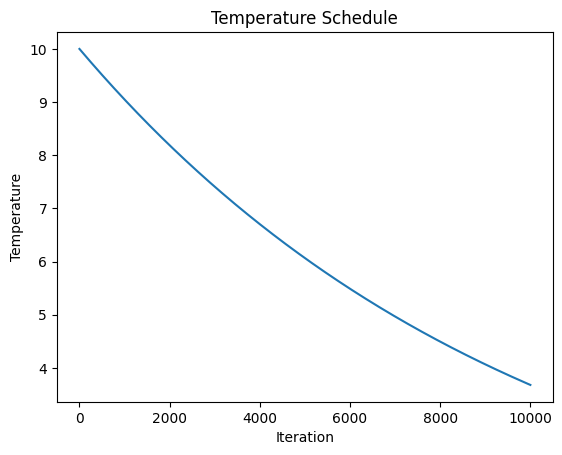

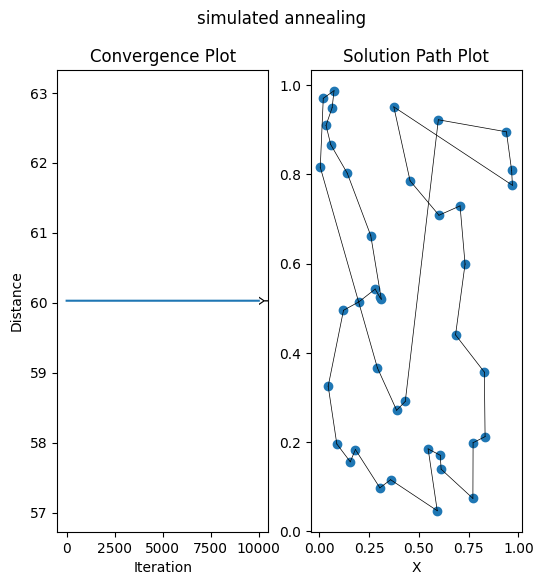

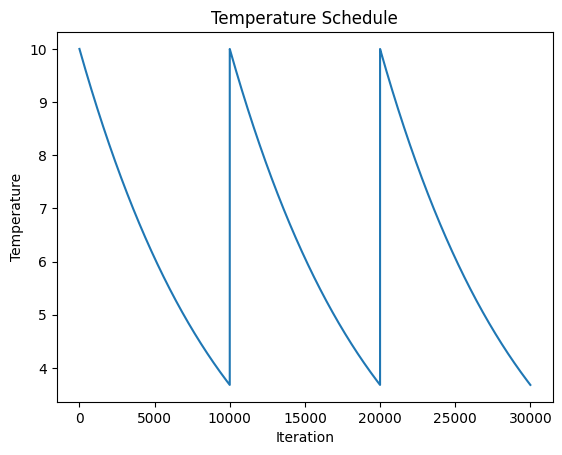

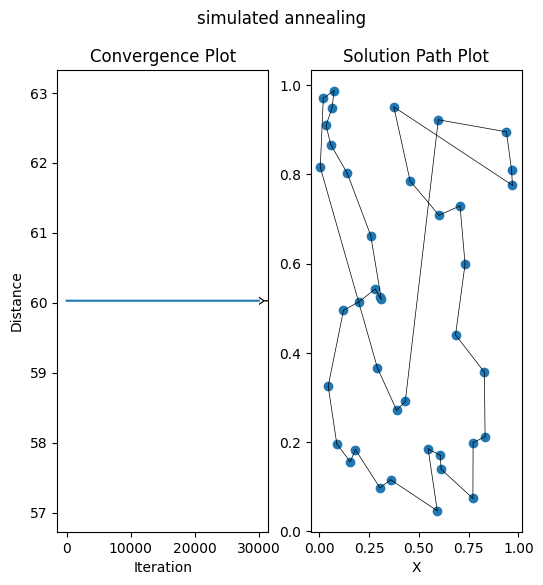

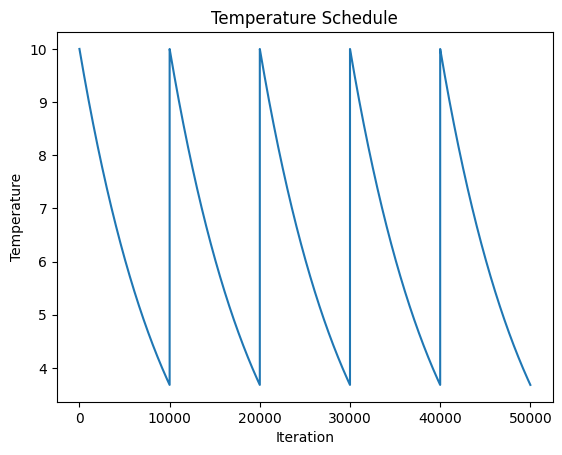

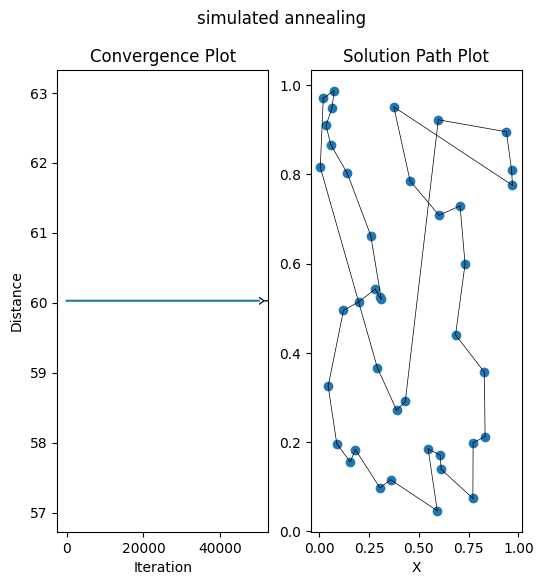

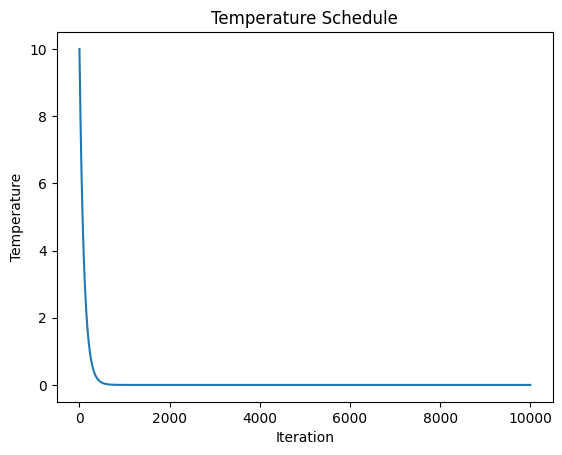

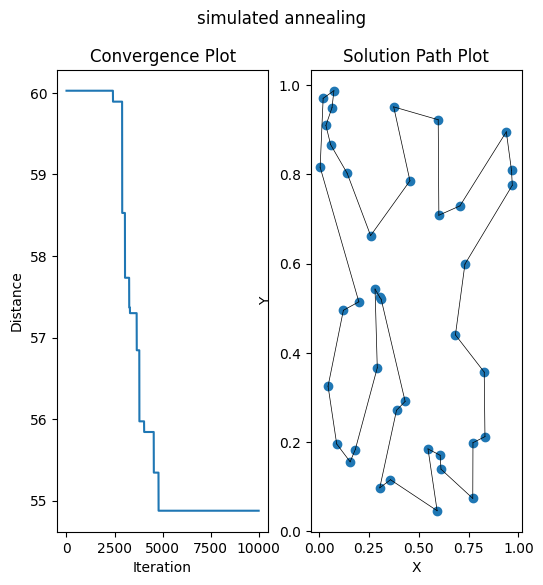

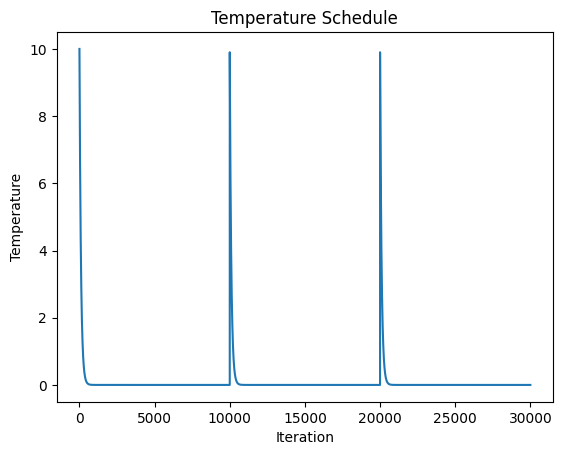

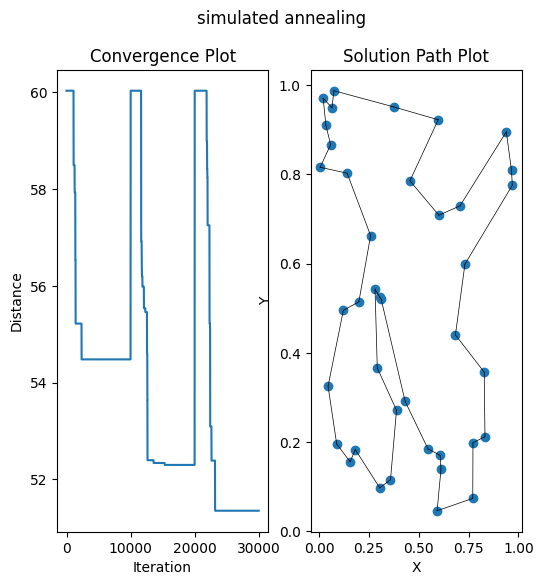

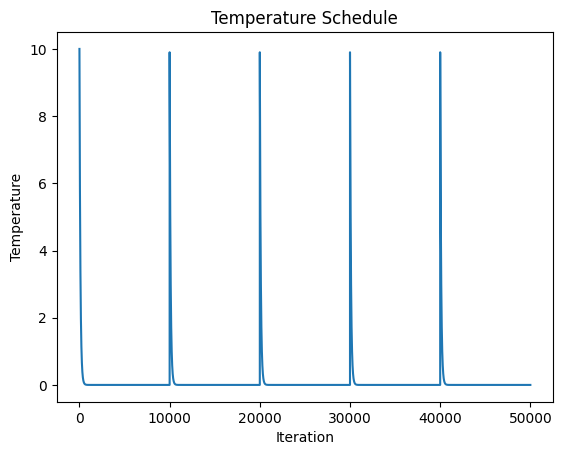

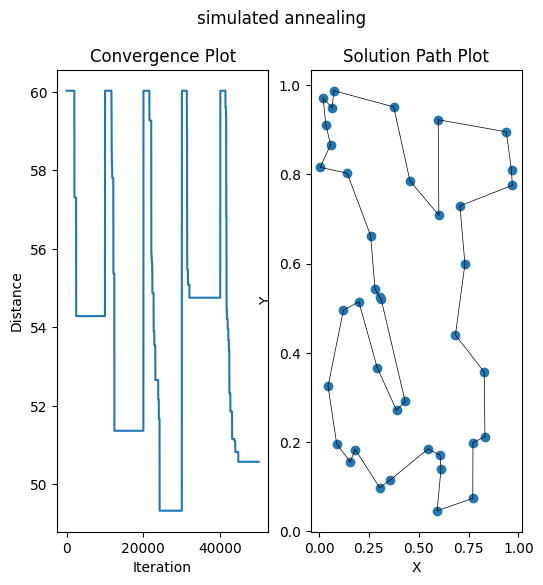

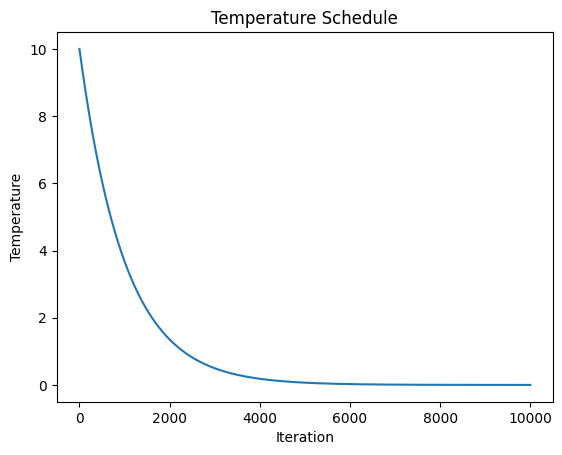

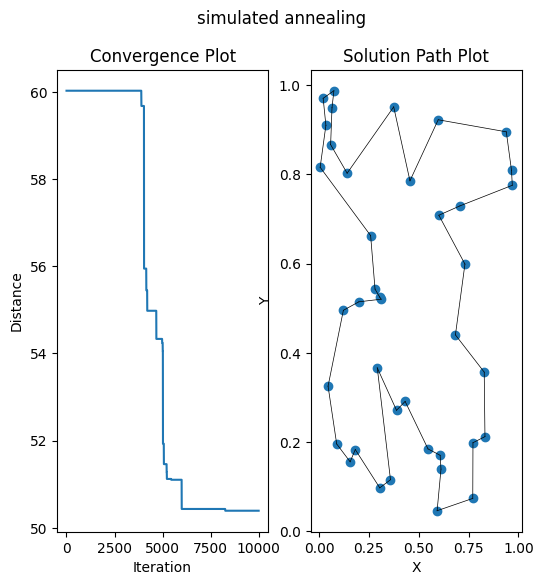

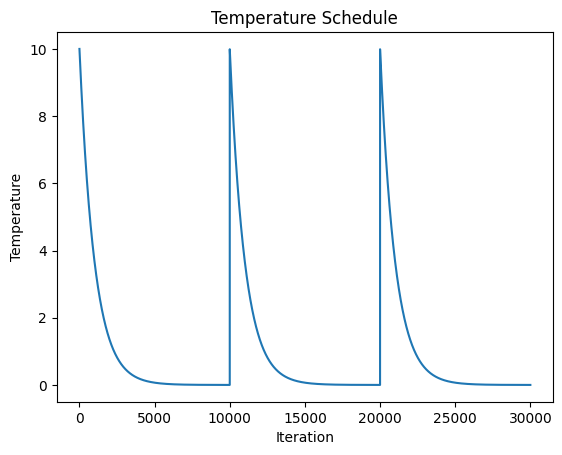

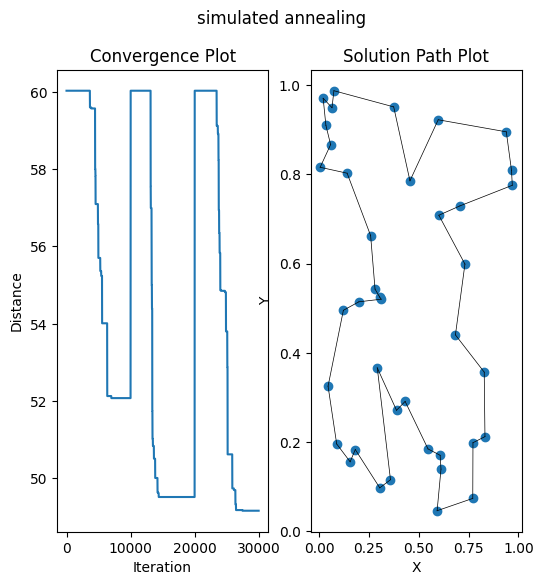

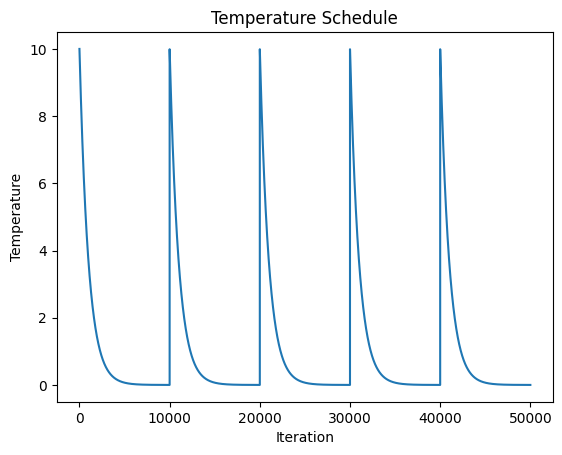

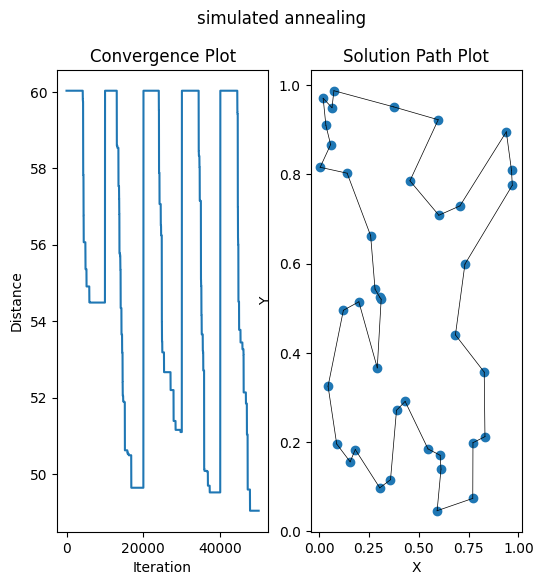

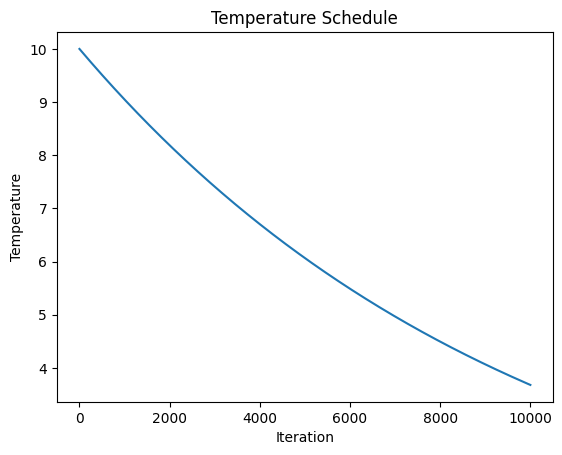

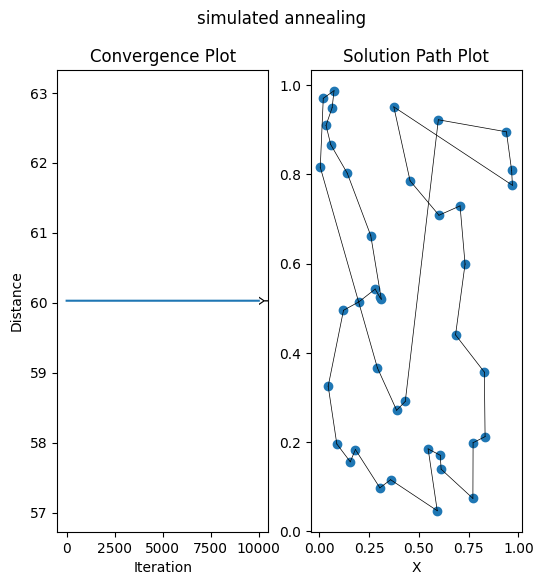

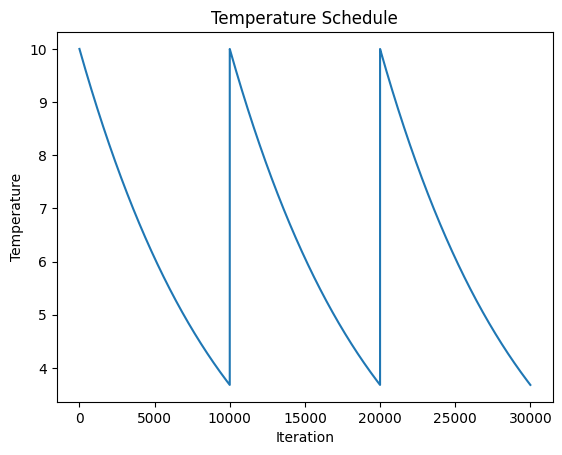

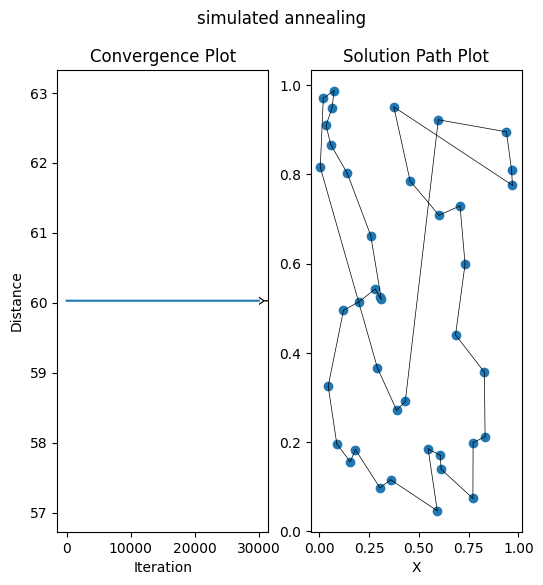

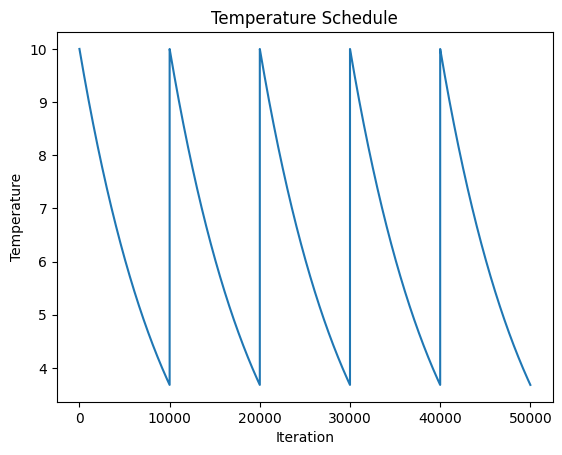

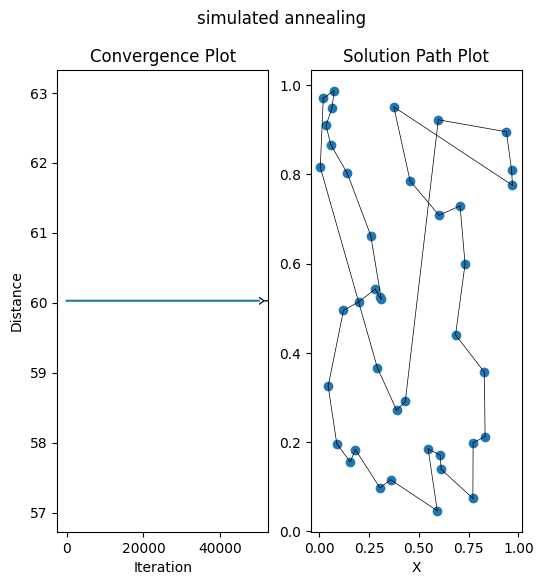

Best parameters: (10.0, 0.001, 0.999, 3)
Improved tour: [37, 4, 1, 19, 31, 6, 35, 38, 14, 10, 15, 24, 9, 30, 39, 18, 7, 2, 28, 29, 20, 13, 11, 23, 8, 32, 22, 33, 36, 3, 21, 5, 16, 34, 0, 12, 27, 26, 17, 25]
Improved total distance: 48.97316374987793


In [25]:
import itertools

# Define a range of values for each parameter
#max_iter_range = np.array([5000, 10000, 15000])
initial_temp_range = np.array([0.1, 1,10])
final_temp_range = np.array([0.0001, 0.001, 0.01])
alpha_range = np.array([0.99, 0.999, 0.9999])
n_restart_range = np.array([1, 3, 5])

# Generate all possible combinations of parameter values
param_combinations = list(itertools.product(initial_temp_range, final_temp_range, alpha_range, n_restart_range))

# Evaluate each combination of parameters and keep track of the best one
best_tour = None
best_distance = float('inf')
best_params = None

for params in param_combinations:
    initial_temp, final_temp, alpha, n_restart = params
    tour, distance = simulated_annealing(distance_mat, 10000, initial_temp, final_temp, alpha, n_restart)
    if distance < best_distance:
        best_tour = tour
        best_distance = distance
        best_params = params

# Print the best parameters and the corresponding results
print('Best parameters:', best_params)
print('Improved tour:', best_tour)
print('Improved total distance:', best_distance)
